In [1]:
import pickle
import numpy as np
import pandas as pd
with open("4Andrea.pkl", "rb") as file:
    data = pickle.load(file)

In [194]:
with open("4Andrea_coordcs.pkl", "rb") as file:
    dataradial = pickle.load( file)
dfcoord, dfcs, dfccat, dfcca, dfcoa = dataradial[0], dataradial[1], dataradial[2], dataradial[3], dataradial[4]

In [198]:
dfca = dfcca

In [199]:
dfca[['cell0','cell1','cell2','cell3','cell4','cell5','cell6','cell7','cell8']] = dfcca[['cell0','cell1','cell2','cell3','cell4','cell5','cell6','cell7','cell8']
                                                                                       ].add(dfcoa[['cell0','cell1','cell2','cell3','cell4','cell5','cell6','cell7','cell8']])

In [142]:
data[0]['pSet'][0]

'5'

In [143]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
path2file.format(data[0]['scenario'][0], data[0]['pSet'][0])

'TraiRhizo/paperSc/NewSetup/baseline_1440_5_10to25_20mn_0s_32/'

In [148]:

#setIds =[61]# ,44,49 [7,21, 47, 85]
mmolSuc_to_molC = 1/1e3*12
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
#dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
#              for setId in setIds if (scenario, str(setId)) 
#              not in exceptPset ]
scenarios = [ "baseline", "lateDry","earlyDry"]
for dd in data:
    path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
    pathresults = "../../scripts/results/"
    
    dataInput =  path2file.format(dd['scenario'][0], dd['pSet'][0])
    print('path2file',dataInput)
    try:
        volOrg = getVal(dataInput,'volOrg.txt')
        ot_orgs = getVal(dataInput,'ot_orgs.txt')
        Q_Gr = getVal(dataInput,'Q_Gr.txt')*0.8+ + getVal(dataInput,'Q_S_ST.txt'
                )+getVal(dataInput,'Q_S_meso.txt') + getVal(dataInput,'Q_meso.txt')+ getVal(dataInput,'Q_ST.txt')
        ots = getVal(dataInput,'organTypes.txt')
        ots.insert(0, "seed", 2)
        rootinit = volOrg[(ot_orgs == 2)].sum(axis=1)[0]*0.5 * mmolSuc_to_molC
        steminit = volOrg[(ot_orgs == 3)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
        leafinit = volOrg[(ot_orgs == 4)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
        rootVol = Q_Gr[(ots == 2)].sum(axis=1)+rootinit#*0
        #rootVol2 = Q_Gr[(ot_orgs == 2)].sum(axis=1)+rootinit*0
        stemVol = Q_Gr[(ots == 3)].sum(axis=1)+steminit
        leafVol = Q_Gr[(ots == 4)].sum(axis=1)+leafinit
        #time = np.array(list(
        #            pd.read_csv(pathresults + dataInput[0] + "time.txt", 
        #                           names = ["time","Qlight"])["time"][1:])) 
        dd['root:shoot'] = (rootVol).div(stemVol+leafVol)
    except:
        print('failed')
    #plt.plot(time[100:] ,(rootVol2)[100:]/(stemVol+leafVol)[100:],linewidth=3, label=scenarios[i]+'bis',
    #    )
#plt.legend()
#plt.show()
#plt.close()

path2file TraiRhizo/paperSc/NewSetup/baseline_1440_5_10to25_20mn_0s_32/
path2file TraiRhizo/paperSc/NewSetup/baseline_1440_44_10to25_20mn_0s_32/
path2file TraiRhizo/paperSc/NewSetup/baseline_1440_61_10to25_20mn_0s_32/
path2file TraiRhizo/paperSc/NewSetup/lateDry_1440_5_10to25_20mn_0s_32/
path2file TraiRhizo/paperSc/NewSetup/lateDry_1440_44_10to25_20mn_0s_32/
path2file TraiRhizo/paperSc/NewSetup/lateDry_1440_61_10to25_20mn_0s_32/
path2file TraiRhizo/paperSc/NewSetup/earlyDry_1440_5_10to25_20mn_0s_32/
path2file TraiRhizo/paperSc/NewSetup/earlyDry_1440_44_10to25_20mn_0s_32/
failed
path2file TraiRhizo/paperSc/NewSetup/earlyDry_1440_61_10to25_20mn_0s_32/


1.1057067414025927e-07 0.0001863590244508788


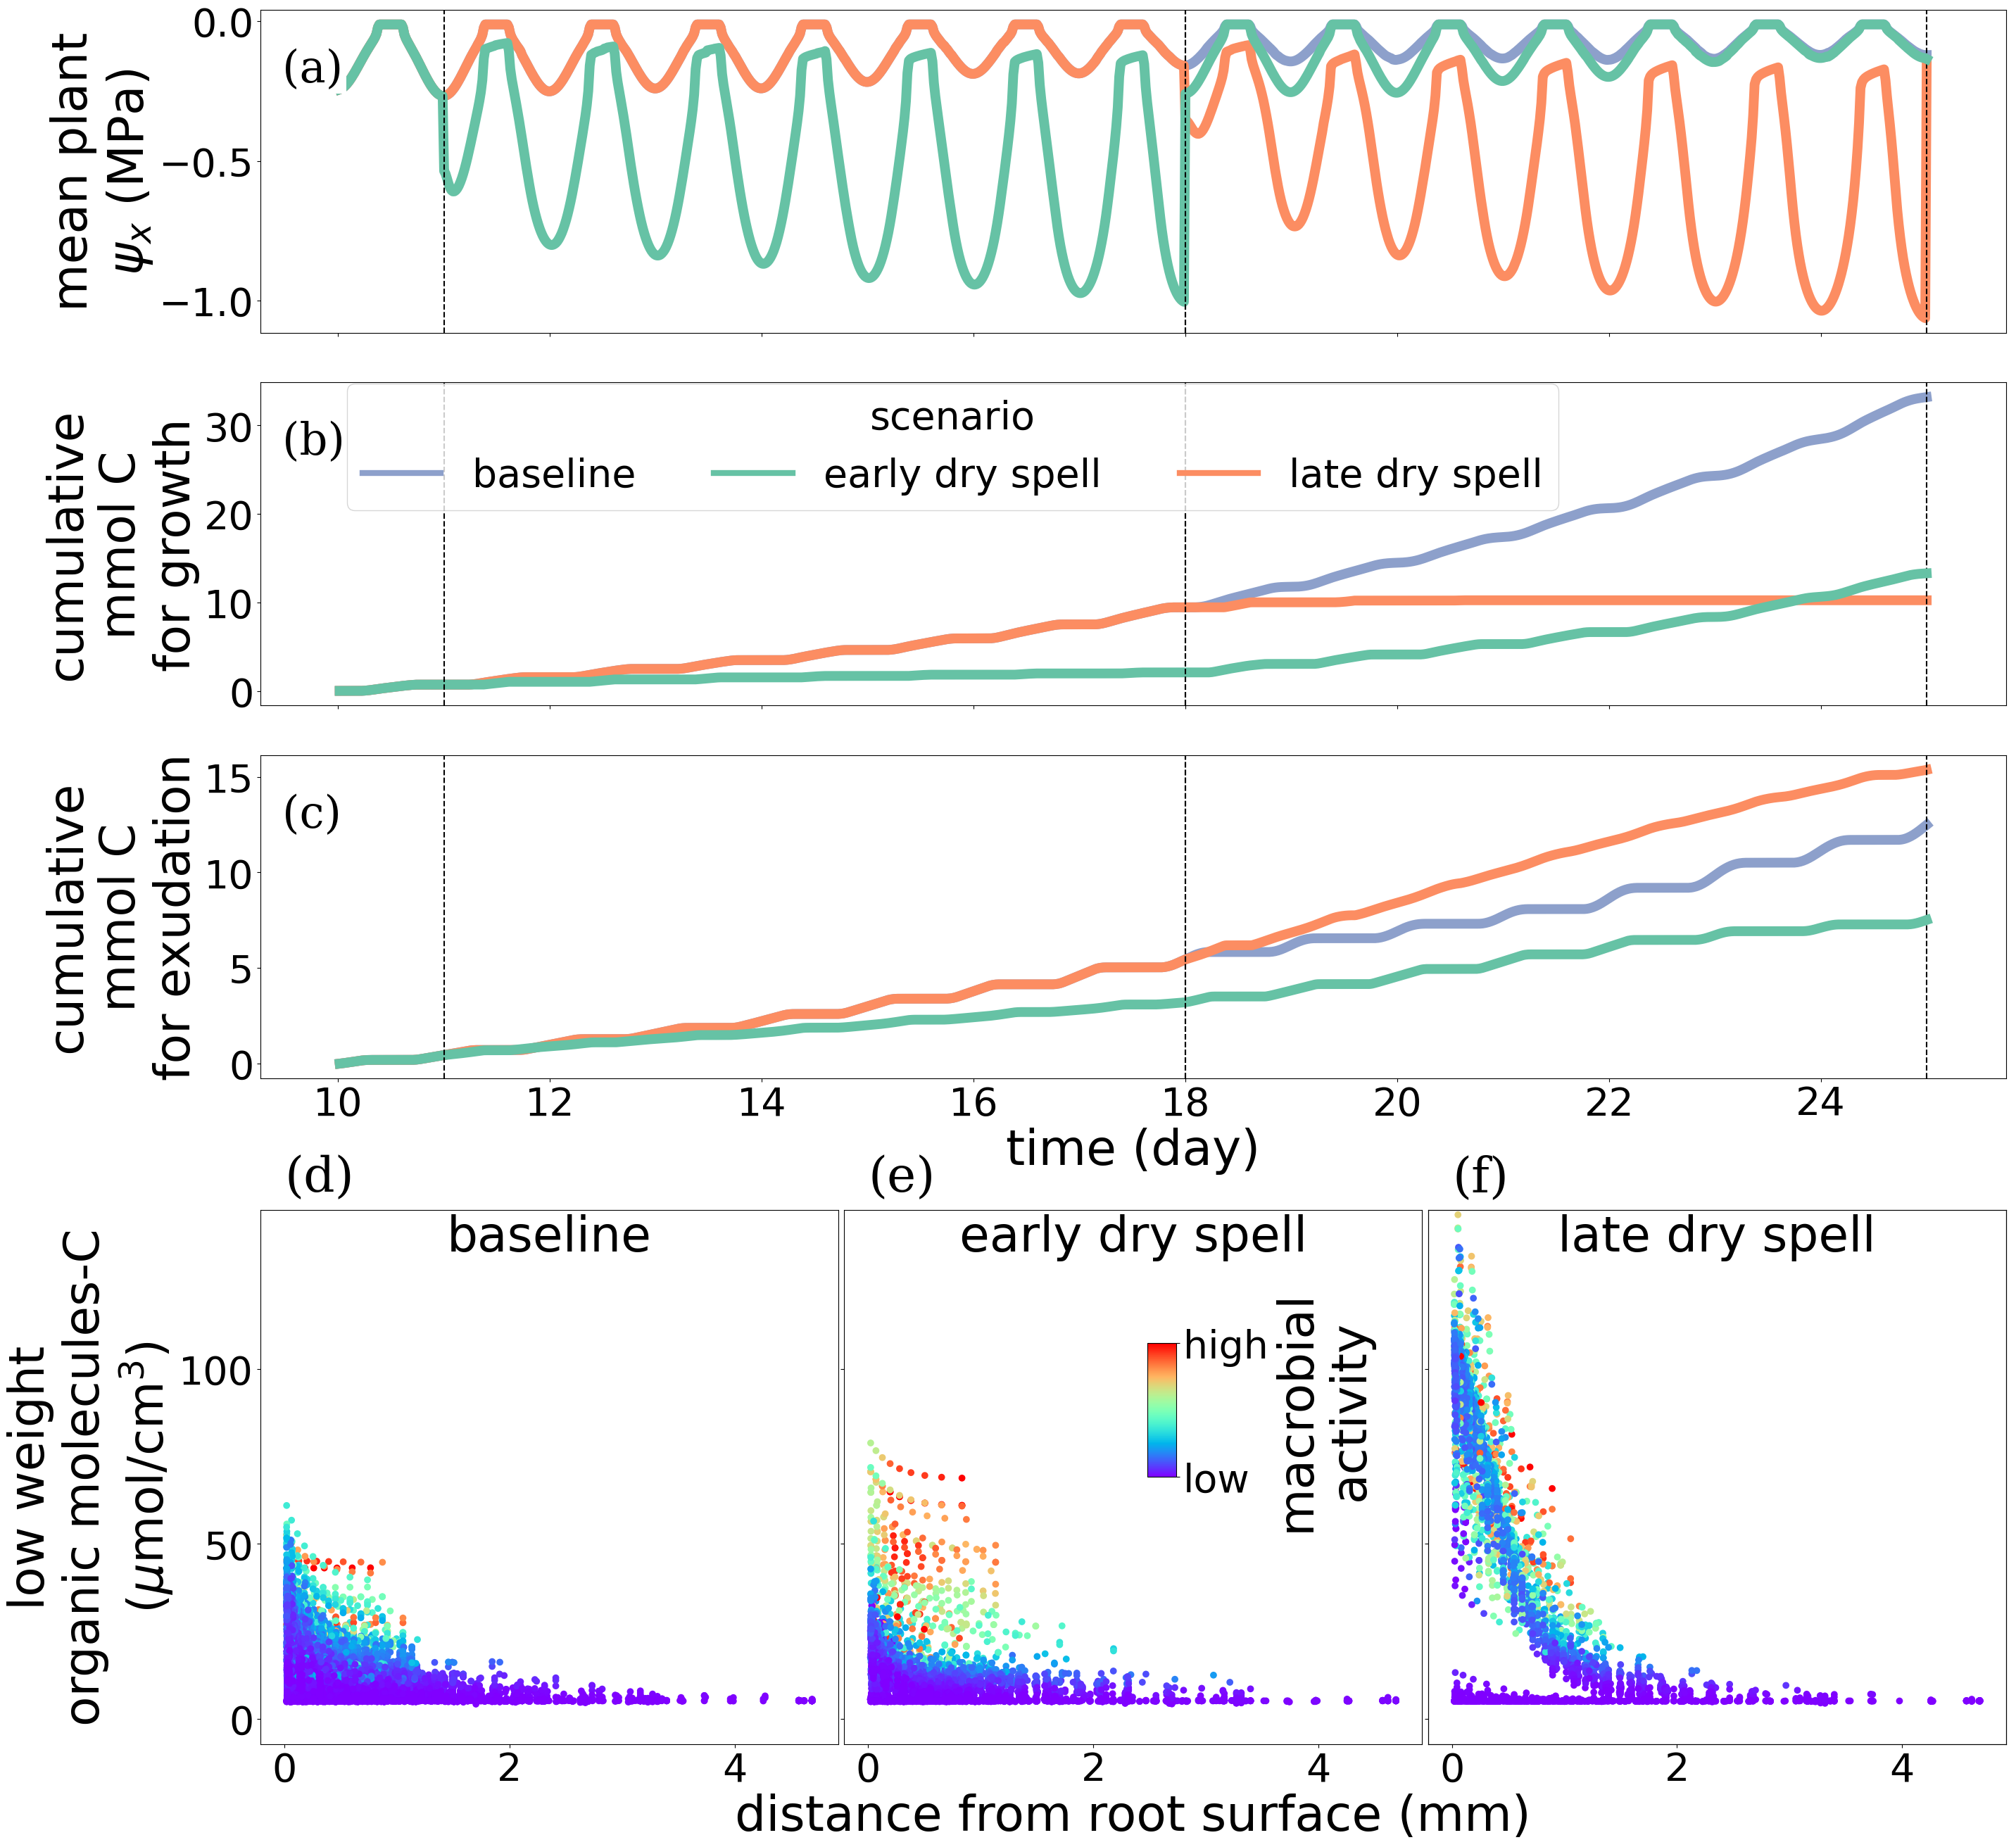

In [204]:
import matplotlib
import os
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
viridis = matplotlib.colormaps.get_cmap('Set1')
from matplotlib.gridspec import GridSpec

import string
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter
from matplotlib.transforms import ScaledTranslation
l_styles = {5:'-',44:'--',61:':'}
# Define the color dictionary
c_styles = {
    'baseline':'#8da0cb',  # Blue
    'earlyDry':  '#66c2a5' ,  # Green
    'lateDry': '#fc8d62'  # red
}


color_legend_elements = [
    Line2D([0], [0], color=c_styles['baseline'], lw=6, label='baseline'),
    Line2D([0], [0], color=c_styles['earlyDry'], lw=6, label='early dry spell'),
    Line2D([0], [0], color=c_styles['lateDry'], lw=6, label='late dry spell')
]

# Line style legend
linestyle_legend_elements = [
    Line2D([0], [0], color='black', linestyle=l_styles[5], lw=6, label="highCO2"),
    #Line2D([0], [0], color='black', linestyle=l_styles[38], lw=6, label=38),
    Line2D([0], [0], color='black', linestyle=l_styles[44], lw=6, label="highMB"),
    Line2D([0], [0], color='black', linestyle=l_styles[61], lw=6, label="highSolutes")
]

def dotheplot(ax, toplot, cumsum,df, sizerows,sizecols_,namesyaxes=None,ncols=3, maxTime = None, 
              indexlegend1=0, indexlegend2=1, microbes = [5,44,61]):
    nrows = len(toplot)
    #ncols = 3
    scenarios = [ "baseline","earlyDry", "lateDry"]
    sizecols = sizecols_*ncols

    cm3tommol = 1000*(1/18.01528)

    # higher than in the 1st paper
    # probably in part because i increased the kr of the roots
    cm3tommol = 1000*(1/18.01528)
    ratioTrans = 250 
    
    #fig, ax = plt.subplots(nrows, ncols,figsize=(sizerows,sizecols))  # 2 rows, 2 columns
    if len(microbes) < 3:
        df = [dftemp for dftemp in df if int(dftemp['pSet'].unique()[0]) in microbes]
        
    for ddid, dd in enumerate(df):
        for rowid, tipi in enumerate(toplot): 
            try:
                pset_ = int(dd['pSet'].unique()[0])
            except:
                print('rowid', rowid,tipi)
                print(dd['pSet'].unique())
            scenario_ = dd['scenario'].unique()[0]
            if ncols > 1:
                colid = np.where(scenario_==np.array(scenarios))[0][0]
            else:
                colid = 0
            factor = 1000
            rot = 0
            unit=" (mmol C)"
            if (tipi == "trans" )or (tipi =='psiXyl'):
                factor = cm3tommol
                unit = "(MPa)"
            if tipi == 'root:shoot':
                factor = 1
            if tipi == "psiXyl":
                factor = 1.e-4
                rot =0
                unit = "(MPa)"
            ddd = dd[tipi]*factor
            tts = dd['time']
            if not cumsum:
                tts = dd['time'][1:]
                ddd = np.diff(ddd)*4
            
            if ncols > 1:
                ax_ = ax[rowid, colid]
            else:
                ax_ = ax[rowid]
                
            if len(microbes) == 3:
                lttemp = l_styles[int(dd['pSet'].unique()[0])]
            else:
                lttemp = '-'
                
            ax_.plot( tts,ddd,
                                                             linewidth=10,
                         #label=f'{i}',
                         c=c_styles[dd['scenario'].unique()[0]],
                         linestyle=lttemp
                    )
            
                
            ax_.tick_params(axis='both', which='major', labelsize=40)
            ax_.tick_params(axis='y', which='major', labelrotation=rot, labelsize=40)
            if colid == 0:
                if namesyaxes is not None:
                    if tipi == "psiXyl":
                        ax_.set_ylabel(namesyaxes[tipi]+unit, fontsize=50)
                    elif tipi == 'root:shoot':
                        ax_.set_ylabel(namesyaxes[tipi]+' (-)', fontsize=50)
                    else:
                        ax_.set_ylabel("cumulative\nmmol C\nfor"+namesyaxes[tipi], fontsize=50)
                else:
                    ax_.set_ylabel(tipi+unit, fontsize=50)
            if rowid == 0 and ncols > 1:
                ax_.set_title(scenario_)
            if rowid == nrows-1:
                ax_.set_xlabel('time (day)', fontsize=50)
            else:
                ax_.set_xticklabels([])
                
            if True:
                if scenario_ == "lateDry":
                    ax_.axvline(x=18, color='k', linestyle='--')
                    ax_.axvline(x=25, color='k', linestyle='--')
                if scenario_ == "earlyDry":
                    ax_.axvline(x=18, color='k', linestyle='--')
                    ax_.axvline(x=11, color='k', linestyle='--')
            if maxTime is not None:
                ax_.set_xlim(10, maxTime)
                
            if rowid + colid == indexlegend1:
                ax_.legend(handles=color_legend_elements, 
                                                           fontsize=40,title_fontsize='40', title='scenario', 
                                                           bbox_to_anchor=(0.755, 0.8),  ncol=3)#bbox_to_anchor=(0.5, -0.15),
                
            if (rowid + colid == indexlegend2) and (len(microbes) == 3):
                ax_.legend(handles=linestyle_legend_elements, 
                                                           fontsize=50,title_fontsize='50', title='parameter set', 
                                                           loc='upper center',  ncol=3)#bbox_to_anchor=(0.5, -0.3),
                if False:
                    
                    ax_.add_artist(plt.legend(handles=color_legend_elements, 
                                                                              fontsize=40, title='scenario', 
                                                                               title_fontsize='40',
                                                                              loc='upper center',# bbox_to_anchor=anchor1,#(0.5, -0.15), 
                                                                              ncol=3, framealpha=1))
                    ax_.add_artist(plt.legend(handles=linestyle_legend_elements, 
                                                                              fontsize=50, title='parameter set', 
                                                                               title_fontsize='50',
                                                                              loc='upper center',# bbox_to_anchor=anchor2,#(0.5, -0.3), 
                                                                              ncol=3, framealpha=1))

                #ax_.legend() 
            index = rowid * ncols + colid
            # Get the corresponding letter label
            label = '('+string.ascii_lowercase[index]+')'
            ax_.annotate(
                    label,
                    xy=(0, 0.95), xycoords='axes fraction',
                    xytext=(+0.5, -0.5), textcoords='offset fontsize',
                    fontsize='45', verticalalignment='top', fontfamily='serif',
                    bbox=dict(facecolor='1.', edgecolor='none', pad=3.0))
    # plt.tight_layout()
    
def getValAlongR(fig,ax, dfx_, dfy_,ylab=None, xlab=None,oneylim=False,oneylimPerRow=False,
                 unitChangex=10,unitChangey=1e6,timeeval=-1., colordf_=None,doLog=False,
                   dosave=False, doshow=True, savedir='./', saveName='myimage',
                 bboxanchor_=(0.5, 0.9,1,1),
                      sizerows=8,sizecols=6,colidLegend=0, rowidLegend=0,
                 collabel='',
                loc_='upper center'):
    for extraText in [savedir]:
        if not os.path.exists(extraText):
            os.makedirs(extraText)

    #color_palette = sns.color_palette("hsv", 9)
    color_palette = ['#8e0152','#c51b7d','#de77ae','#f1b6da','#fde0ef',
                     '#e6f5d0','#b8e186','#7fbc41','#4d9221'] # colorblind friendly
    color_mapping = dict(zip([i for i in range(9)], color_palette))

    # Loop for each subplot
    scenarios =np.array( ['baseline', 'earlyDry', 'lateDry'])
    pSets =  np.array([61])
    
    pSetscenarios = np.array( [(pSets[0],'baseline'),(pSets[0], 'earlyDry'),(pSets[0], 'lateDry')]) #[tuple(r) for r in dfx_[['pSet', 'scenario']].drop_duplicates().to_numpy()]
    ncols = len(scenarios)
    nrows = len(pSets)
    
    #fig, ax = plt.subplots(nrows, ncols,figsize=(sizerows,sizecols)) 
    if timeeval < 0.:
        timeeval = max(dfx_['time'])
        addTitle = False
    else:
        addTitle = True #plt.title(str(int(timeeval*10)/10)+ "d", fontsize=25)
    dfx = dfx_[dfx_['time']==timeeval].copy()
    dfy = dfy_[dfy_['time']==timeeval].copy()
    
    if colordf_ is not None:# or for one specific time?
        maxV = max(colordf_[['cell'+str(i) for i in range (9)]].max())
        minV = min(colordf_[['cell'+str(i) for i in range (9)]].min())
        
        norm = Normalize(vmin=minV, vmax=maxV)
        colordf = colordf_[colordf_['time']==timeeval].copy()

    changeUp = 1.01
    changeDown = 0.9
    if doLog:
        changeUp = 1.
        changeDown = 1.
        
    if oneylim:
        if addTitle:
            max_y = max(list(dfy_[['cell'+str(i) for i in range (9)]].max(axis=0))
                       )*unitChangey*changeUp
            min_y = min(list(dfy_[['cell'+str(i) for i in range (9)]].min(axis=0))
                       )*unitChangey*changeDown
        else:
            max_y = max(list(dfy[['cell'+str(i) for i in range (9)]].max(axis=0))
                       )*unitChangey*changeUp
            min_y = min(list(dfy[['cell'+str(i) for i in range (9)]].min(axis=0))
                       )*unitChangey*changeDown
    elif oneylimPerRow:
        if addTitle:
            max_y = np.array([max(list(dfy_.loc[dfy_['pSet']==str(pp),
                          ['cell'+str(i) for i in range (9)]].max(axis=0))
                                 )*unitChangey*changeUp for pp in pSets
                             ])
            min_y = np.array([min(list(dfy_.loc[dfy_['pSet']==str(pp),
                          ['cell'+str(i) for i in range (9)]].min(axis=0))
                                 )*unitChangey*changeDown for pp in pSets
                             ])
        else:
            max_y = np.array([max(list(dfy.loc[dfy['pSet']==str(pp),
                          ['cell'+str(i) for i in range (9)]].max(axis=0))
                                 )*unitChangey*changeUp for pp in pSets
                             ])
            min_y = np.array([min(list(dfy.loc[dfy['pSet']==str(pp),
                          ['cell'+str(i) for i in range (9)]].min(axis=0))
                                 )*unitChangey*changeDown for pp in pSets
                             ])
    for psetScenario in pSetscenarios:
        
            
        dfx__ =dfx[(dfx['pSet']==psetScenario[0])&(
            dfx['scenario']==psetScenario[1])].copy().reset_index()
        dfy__ =dfy[(dfy['pSet']==psetScenario[0])&(
            dfy['scenario']==psetScenario[1])].copy().reset_index()
        if colordf_ is not None:
            colordf__ =colordf[(colordf['pSet']==psetScenario[0])&(
                colordf['scenario']==psetScenario[1])].copy().reset_index()


        rowid = np.where(int(psetScenario[0])==pSets)[0] 
        if False:#ncols > 1:
            colid = np.where(psetScenario[1]==scenarios)[0] 
            ax_ = ax[rowid, colid][0]
        else:
            colid = np.where(psetScenario[1]==scenarios)[0] 
            ax_ = ax[colid[0]]
            
        if doLog:
            ax_.set_yscale('log')
            
        #norm = mcolors.LogNorm(vmin=1e-5, vmax=1)  # Avoid zero values!
        for i in range(8,-1,-1):#range(9):
            if colordf_ is None:
                ccOut = [color_mapping[i]]
                scatterCol = ax_.scatter(dfx__['cellS'+str(i) ]*unitChangex,
                    dfy__['cell'+str(i) ]*unitChangey,
                        label =f'{i}',
                       c=ccOut)
            else:
                #cc = colordf__['cell'+str(i) ].values

                #normVal = (cc - minV)/(maxV - minV)
                #ccOut = viridis(normVal)#, cmap='viridis', norm=norm
                
                scatterCol = ax_.scatter(dfx__['cellS'+str(i) ]*unitChangex,
                    dfy__['cell'+str(i) ]*unitChangey, 
                     c=colordf__['cell'+str(i) ].values,#norm=norm,
                                         cmap='rainbow',# 'nipy_spectral',#'gist_ncar',#'winter',#'copper',#'viridis', 
                                         )
            #print('normVal',min(normVal), max(normVal))    
            
        
        if oneylim:
            if doLog:
                ax_.set_ylim(ymax=max_y, ymin=min_y)
            else:
                ax_.set_ylim(ymax=max_y, ymin=-max_y*0.5/100.)
        if oneylimPerRow:
            
            if doLog:
                ax_.set_ylim(ymax=max_y[rowid], ymin=min_y[rowid])
            else:
                ax_.set_ylim(ymax=max_y[rowid], ymin=-max_y[rowid]*5./100.)
        
        if (colid==1):
            ax_.set_xlabel(xlab, fontsize=50)#'maximum '+independent_variable+' (mol/cm3 water)')
        
        pset2name = {'5':"highCO2",'44':"highMB",'61':"lowMUptake"}
        if (colid==0):
            ax_.set_ylabel(ylab, fontsize=50)
        if (colid==2):
            ax2 = ax_.twinx()
            ax2.set_yticks([])
                
                
        ax_.tick_params(axis='both', which='major', labelsize=40)




        # Get the corresponding letter label
        label ='('+ string.ascii_lowercase[(rowid*ncols+colid)[0]+3]+')'
        ax_.annotate(
                label,
                xy=(0, 1.15), xycoords='axes fraction',
                xytext=(+0.5, -0.5), textcoords='offset fontsize',
                fontsize='50', verticalalignment='top', fontfamily='serif',
                bbox=dict(facecolor='1.', edgecolor='none', pad=3.0))
        # Remove tick labels
        if colid > 0 and (oneylimPerRow or oneylim):
            ax_.set_yticklabels([])
            
        ax_.grid(False)
        scen2name = {'baseline':"baseline",'earlyDry':"early dry spell",'lateDry':"late dry spell"}
        
        if (rowid==0):
            ax_.text(0.5, 0.905, scen2name[psetScenario[1]], 
                         fontsize=50, 
                         ha='center', va='bottom', transform=ax_.transAxes)


       
        if (colid == colidLegend) and (rowid==rowidLegend):
            if colordf_ is None:
                #get handles and labels
                handles, labels = ax_.get_legend_handles_labels()

                #specify order of items in legend
                order = [i for i in range(8,-1,-1)]

                #add legend to plot
                ax_.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
                           fontsize=50,title_fontsize='50', columnspacing=0.9, 
                           handletextpad=0.1,
                           title='1d cell index',ncol=3,
                           loc=loc_)
            else:
                # Step 4: Create a colorbar inside the second subplot
                cax = inset_axes(ax_, width="50%", height="100%", loc='center',
                                      bbox_to_anchor=(0.5, 0.5, 0.1, 0.25),
                                      bbox_transform=ax_.transAxes,
                                      borderpad=0)

                # Step 4: Create a single colorbar for all subplots
                #divider = make_axes_locatable(ax_)
                # Use LogNorm for logarithmic scale

                # Display image with log normalization
                #cax = ax.imshow(data, cmap="ranbow", norm=norm)
                #cax = divider.append_axes('right', size='5%', pad=0.05)
                cbar = fig.colorbar(scatterCol, cax=cax)
                cbar.set_label(collabel, fontsize=50)
                cbar.ax.tick_params(labelsize=40)  # Adjust font size of colorbar ticks
                print(colordf__['cell'+str(i) ].min(),colordf__['cell'+str(i) ].max())
                cbar.ax.set_yticks([colordf__['cell'+str(i) ].min(),colordf__['cell'+str(i) ].max()])  # Define tick positions
                cbar.ax.set_yticklabels(["low",  "high"])  # Set new labels
    #plt.tight_layout()
    # Manually adjust subplot spacing and figure layout
    #plt.subplots_adjust(wspace=0.01, hspace=0.15)  # Adjust width space between subplots

    plt.grid(False)
    #if dosave:
    #    plt.savefig(savedir+saveName+'.png', pad_inches=0.5)
    #if doshow:
    #    plt.show()
    #plt.close()
    

def format_numbers_with_leading_zeros(numbers):
    digit_count =max([ len(str(abs(number))) for number in numbers])
    # Convert each number to a string and pad with leading zeros
    formatted_numbers = [str(number).zfill(digit_count) for number in numbers]
    return formatted_numbers


    
# gridspec inside gridspec
unitfig = 4
f = plt.figure(figsize=(8*unitfig,8*unitfig))

gs0 = GridSpec(6, 3, figure=f,wspace = 0.01)
gs0.set_height_ratios([1, 1, 1, 0.1,0.5, 1])
#gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[0])
ax0 = f.add_subplot(gs0[0,:])
ax1 = f.add_subplot(gs0[1,:])
ax2 = f.add_subplot(gs0[2,:])
ax30 = f.add_subplot(gs0[4:,0])
ax31 = f.add_subplot(gs0[4:,1])
ax32 = f.add_subplot(gs0[4:,2])
dotheplot([ax0,ax1,ax2],toplot =  ['psiXyl','Q_Gr',#'root:shoot',
                                   'Q_Exud'],#'Q_Exud_mean','Q_Gr',
          namesyaxes={'psiXyl':"mean plant\n$\psi_x$ ", 'Resp':'Resp','root:shoot':'root:shoot\nC ratio',
                      'Q_Gr':" growth", "Q_Rm":"maintenance","Q_Ag":"Q_Ag",
                      'Q_Exud':" exudation",'Q_Exud_mean':"exudation rate\n at root tip",
                      'Q_Mucil': "mucilage release"},microbes = [61],
          cumsum=True, df=data, sizerows=20,sizecols_=15,ncols=1, 
          indexlegend1=1, indexlegend2=1)
getValAlongR(f,[ax30,ax31,ax32], dfcoord, dfcs,unitChangex=10,unitChangey=1e6,oneylimPerRow = True,
                       ylab="low weight\norganic molecules-C\n($\mu$mol/cm$^3$)",
                       xlab="distance from root surface (mm)",loc_='upper right',
                   dosave=True, doshow=True, savedir='./',  
             collabel='macrobial\nactivity',#'$C_C^a/C_C$',
             colordf_=dfca,#dfccat,
                       saveName='POFpresentation_radial',
                 #timeeval=alltime[-1],
          sizerows=15,sizecols=5,colidLegend=1, rowidLegend=0)


def format_axes(f):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

plt.savefig('POFpresentation.png', dpi=300)

In [197]:
dfca

,cell0,cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8
0,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
1,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
2,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
3,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
4,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
...,...,...,...,...,...,...,...,...,...
3320013,0.000013,0.000014,0.000015,0.000015,0.000014,0.000013,0.000005,0.000002,0.000002
3320014,0.000013,0.000014,0.000015,0.000015,0.000014,0.000013,0.000005,0.000002,0.000002
3320015,0.000013,0.000014,0.000015,0.000015,0.000014,0.000013,0.000005,0.000002,0.000002
3320016,0.000013,0.000014,0.000014,0.000015,0.000014,0.000013,0.000005,0.000002,0.000002


In [190]:
print(dfccat[['cell0','cell1','cell2','cell3','cell4','cell5','cell6','cell7','cell8']].min().min(),
      dfccat[['cell0','cell1','cell2','cell3','cell4','cell5','cell6','cell7','cell8']].max().max())

7.74792324766959e-05 1.0


In [122]:
ot = np.array([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,4,4,4,4,4,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,4,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,4,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,4,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,4,2,2,2,2,2,4,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,4,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,2,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,4,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])

In [123]:
exudnodes = np.array([0.0,0.0,0.0,0.0,0.0,5.7681993376857476e-05,0.0,0.0,0.0,5.768707637252116e-05,0.0,0.0,0.0,0.0,6.327175232457403e-05,0.0,0.0,0.0,6.327285995204503e-05,0.0,0.0,0.0,3.628036342454428e-05,0.0,0.0,3.628038460026656e-05,0.0,0.0,0.0,3.93191054582193e-05,0.0,0.0,3.931841118104133e-05,0.0,0.0,0.0,5.17283730041588e-05,0.0,0.0,5.175537816671517e-05,0.0,0.0,0.0,5.716210760491978e-05,0.0,0.0,5.716223932714289e-05,0.0,0.0,3.614485819616233e-05,0.0,3.614470510875705e-05,0.0,0.0,4.247044660970307e-05,0.0,4.247040912880224e-05,0.0,3.102134648229424e-05,3.102135704331662e-05,0.0,3.4933620747916325e-05,3.4933648658188034e-05,0.0,4.991757372495848e-05,4.9917575152891076e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.419974847628717e-05,0.0,0.0,0.0,3.842614653119762e-05,0.0,0.0,3.8426066712672104e-05,0.0,0.0,0.0,4.896620662507054e-05,0.0,0.0,4.896557706199152e-05,0.0,0.0,0.0,5.549857832379247e-05,0.0,0.0,5.5498580069577254e-05,0.0,0.0,3.5360864538051154e-05,0.0,3.536088780308019e-05,0.0,0.0,3.745746456664213e-05,0.0,3.7457479726463887e-05,0.0,0.0,4.602409611648871e-05,0.0,4.602412845586719e-05,0.0,3.250026481204339e-05,3.2438948393487506e-05,0.0,3.8222990287766436e-05,3.822298838151941e-05,0.0,5.287026876040191e-05,5.287025391935616e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00010242642691922495,0.0,4.52018570121532e-05,4.5201855977811767e-05,0.0,6.317110109659242e-05,6.317091675405135e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.879790916561167e-05,0.0,0.0,0.0,0.0,0.0,0.0,9.35582340541034e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.852956058210975e-05,4.852958298220505e-05,5.413874447527559e-05,5.413880449729592e-05,5.9353178629101744e-05,5.935321051316923e-05,5.1279495340246456e-05,5.1278422291284094e-05,9.853371330701915e-05,6.17318054901873e-05,0.0,4.91185849917321e-05,5.232199420634056e-05,0.0,6.416496648604794e-05,6.416488229856346e-05,4.730652621441887e-05,7.989092808069244e-05,4.2078655508007764e-05,4.20784224475079e-05,4.8294370128117515e-05,4.105172360050912e-05,4.449027698309642e-05,4.041470273187656e-05,4.0414729503555216e-05,4.9372540444473896e-05,4.93725602705706e-05,0.0,4.907538725862221e-05,4.907453559500305e-05,8.45477111099717e-05,8.573278938544507e-05,5.2648346981051904e-05,5.2648335071540035e-05,5.3602826770401875e-05,4.388498805046322e-05,4.388498471113438e-05,3.816195212142885e-05,4.0325616505822566e-05,3.712619112842309e-05,0.0,3.283153823854474e-05,4.5015790109961834e-05,4.5015170263685355e-05,3.9735488630251676e-05,7.384158235908608e-05,3.721249905156894e-05,3.7212522621648935e-05,0.0,4.338458433379687e-05,3.263544376361236e-05,3.224456014279321e-05,2.9768523334058205e-05,4.0803858960660055e-05,4.080391803089282e-05,2.506308599626832e-05,3.345647926525558e-05,3.3456206606261775e-05,3.269357832131296e-05,3.2694130531477157e-05,3.68567965842681e-05,3.14018229145085e-05,2.5523189369856116e-05,2.5523185293605657e-05,3.883737935477961e-05,3.8839727588796035e-05,2.8472017050926353e-05,2.8472023233586768e-05,5.098374589564071e-05,0.0,5.966440098270243e-05,3.637589298692823e-05,3.6375813272490174e-05,5.668612693067498e-05,0.0,4.059140000280267e-05,4.010380046385134e-05,6.311941822959697e-05,3.507551219268547e-05,2.5843250308958493e-05,0.0,3.2290559623846786e-05,2.310800882144192e-05,1.871821704587683e-05,2.6818150626977155e-05,2.754741674297309e-05,2.043425720956001e-05,2.04342352363738e-05,1.8432779191344912e-05,1.9071562422989387e-05,2.1712426633242824e-05,2.3275932353015624e-05,2.327522591252033e-05,2.948557894580536e-05,2.948682414830516e-05,2.432941126883535e-05,2.4329473576662047e-05,3.261619658288255e-05,3.2613882687113195e-05,2.9117161178821408e-05,5.058357068280237e-05,3.1927054787701415e-05,2.895839521787165e-05,2.744930264782217e-05,2.77506702777117e-05,2.7750650057470252e-05,2.7187677238685456e-05,1.9373734067083973e-05,2.9588517943470257e-05,1.6793937347353947e-05,2.606226183346632e-05,2.6159296264251384e-05,0.0,2.459573632860016e-05,2.459575374346714e-05,1.605837950939135e-05,1.4239863914788213e-05,3.318555730967794e-05,2.341359044383154e-05,3.649791084240806e-05,0.0,1.4290106568806496e-05,2.0780070661153643e-05,2.8480130270679733e-05,2.8480080847244445e-05,1.592242327547008e-05,2.2530809129149698e-05,2.2530853021625903e-05,1.5107335996671118e-05,1.3643741612590507e-05,2.550885929672727e-05,2.550882904278932e-05,2.7251934050875335e-05,2.7663444978235952e-05,2.319893249591649e-05,2.1186169957417812e-05,1.5341553523150774e-05,1.5341574926278068e-05,1.624478606400425e-05,1.464644661042601e-05,4.351893347137321e-05,1.7812875549583814e-05,1.781287440713972e-05,1.4004679929141847e-05,1.4730619639394468e-05,2.569246886234579e-05,2.5691377010573373e-05,1.8411348190290027e-05,1.8411127462721442e-05,2.6187155021433765e-05,2.6187090871555782e-05,2.6674405801385237e-05,2.667444034627708e-05,1.699679843607443e-05,2.2530802322390765e-05,4.3986626973330745e-05,2.297743210946542e-05,2.297744178491846e-05,2.512069957013761e-05,2.512040397630684e-05,1.8038730401822136e-05,1.8038956067521805e-05,1.6196349469000103e-05,1.619636371509708e-05,0.0,2.016856236116245e-05,2.0168589684414275e-05,9.462553049584744e-06,0.0,0.0,3.1344396015407746e-05,2.341662061237191e-05,1.6390711498466617e-05,1.8193546508460092e-05,1.9819818066114244e-05,2.372513709890294e-05,2.373779016240327e-05,1.607540650935832e-05,1.2552350848063532e-05,1.6849866229728068e-05,1.6849367045452562e-05,2.0784176622221348e-05,1.2420283567918438e-05,2.07845924897031e-05,2.2980963709779797e-05,2.2975185402090042e-05,1.7510413314568185e-05,1.7511323658483155e-05,2.2131496246033932e-05,2.2132430582842213e-05,2.126384353716755e-05,2.1262511713850506e-05,1.9910410706915692e-05,1.9910920648376264e-05,0.0,1.0773197549805912e-05,4.519364624051782e-05,1.856396569022101e-05,1.856435082915812e-05,6.687410244902248e-06,1.5460064774656024e-05,1.5460058419020626e-05,1.0087559479634918e-05,1.4064964979784538e-05,1.4065274577707496e-05,1.4630388337226271e-05,1.244883811150899e-05,1.2448729440205885e-05,1.436867045236594e-05,1.691166834675049e-05,1.6911615541406425e-05,1.2744067708765288e-05,7.325106336996901e-06,7.325101394737564e-06,8.903756498327568e-06,8.903736563283386e-06,1.4472819177038394e-05,1.4472329634620176e-05,2.9898054845062947e-05,1.1615576734730035e-05,9.390825201974652e-06,9.390857032660638e-06,1.5640432866573978e-05,8.684615443560076e-06,1.4312948631889082e-05,1.1404004611255459e-05,0.0,1.1437663857974796e-05,1.1437656393272746e-05,1.6015060642289572e-05,0.0,1.3227003346236673e-05,1.1719855467991934e-05,1.17206854667317e-05,1.4267456851045632e-05,1.4266822669393049e-05,1.593863950508377e-05,1.5938819871849582e-05,1.9187706509326643e-05,1.9187326250376698e-05,1.8639058057459047e-05,1.3545758339429634e-05,1.8642632314596393e-05,1.7837340378725126e-05,1.783789228001138e-05,7.625462846323187e-06,1.2872214277848943e-05,3.460890132381262e-05,1.5741262601363015e-05,1.574118977093999e-05,1.4709938875314742e-05,1.4710476008776671e-05,1.2980153539109442e-05,1.297971601625266e-05,7.4881317703473184e-06,1.4811829430077759e-05,1.4811823634245957e-05,1.42552059343569e-05,6.267871487382817e-06,3.936020621892391e-05,1.3418394853796843e-05,1.3418767705877506e-05,5.889148899044847e-06,1.2007250377700437e-05,1.20079800151563e-05,1.269406585856825e-05,8.797898077594285e-06,8.797916935810003e-06,8.651404187639073e-06,1.743260860057937e-05,1.7432603167514224e-05,7.269048438936659e-06,0.0,0.0,0.0,3.949474547238187e-06,1.9268381043319126e-05,8.719352591925438e-06,8.719906160874187e-06,6.528521918310609e-06,9.291063953836186e-06,5.922314751052615e-06,6.767644242161029e-06,1.118563351949302e-05,1.1186219613372277e-05,8.309096482806366e-06,8.30913916628238e-06,9.084990248014748e-06,1.0407635395690238e-05,1.0407632750407814e-05,4.40764199107197e-06,9.545387281884777e-06,4.713335070306852e-06,1.4243751019239659e-05,1.4244661768689602e-05,1.3811455720024855e-05,1.3811383151983227e-05,0.0,9.890698782223378e-06,9.914323728245833e-06,1.0752228455491585e-05,1.0752177667701826e-05,0.0,1.1843051138542714e-05,1.1846055581891448e-05,2.3972464996808982e-05,9.170768698503768e-06,9.171288855681088e-06,0.0,1.6620404268790566e-05,1.6620888391677846e-05,1.1429397657310089e-05,1.1428967595042018e-05,4.92990379473861e-06,5.746353081543298e-06,0.0,8.792080380578617e-06,1.0337435303961095e-05,1.0336712031035655e-05,6.7656529697664516e-06,6.765651405039093e-06,2.811914526149354e-05,8.452315220818335e-06,8.451095221592041e-06,5.586074576436798e-06,3.8989900950915715e-06,1.2805084128659702e-05,1.2804402780155157e-05,1.0006809668498163e-05,9.876331307297899e-06,9.87620813966464e-06,9.22167698129485e-06,7.331473703729026e-06,1.0047981473074504e-05,8.577135385739208e-06,8.575893115710978e-06,4.850447930377172e-06,1.2856095678062099e-05,1.2856099727688684e-05,5.703012172951317e-06,0.0,7.752801369865545e-06,7.75262889238767e-06,1.5389330064492188e-05,1.0231935415917006e-05,1.0148338213581912e-05,5.106931166918919e-06,5.012848299287751e-06,2.5831560320299937e-06,6.122287622866943e-06,4.375944301218937e-06,3.639194403618991e-06,2.4383102848478525e-06,2.058484935541923e-06,2.1097015874623972e-06,6.2333365651882815e-06,5.649633938379346e-06,2.36557899544225e-06,1.3563531994429746e-05,1.3563544484148807e-05,5.932423533165421e-06,2.925677718922956e-06,7.788789835252387e-06,7.167727354265168e-06,4.44714313111919e-06,0.0,6.090440463815433e-06,1.6495106603761118e-05,8.545091950385117e-06,8.545091757226744e-06,0.0,3.790495388268523e-06,6.832277366306102e-06,6.832251572862495e-06,1.3775688510414871e-05,4.7804765139534966e-06,5.191435798256264e-06,3.5097072824682826e-06,3.15903586756261e-06,8.502842880562027e-06,8.502826784220596e-06,8.891569683096842e-06,4.65300412454403e-06,5.841542293287449e-06,1.2997631225678604e-05,1.0734787656672486e-05,1.0735840489164569e-05,6.987307693624892e-06,4.831387344609253e-06,7.94460822461363e-06,7.945076964438435e-06,1.351507208802888e-05,0.0,4.272618892850561e-06,3.0223369301393007e-06,1.4631871939523694e-05,1.4631848964063768e-05,1.0016372702568333e-05,1.0016413560459521e-05,6.668008930291786e-06,6.668008696908742e-06,8.520685113935501e-06,5.367766270388208e-06,5.36778342239167e-06,6.793603644083148e-06,2.048763865226839e-05,9.952120199897692e-06,9.928326009850198e-06,5.78730136963253e-06,6.699181586490488e-06,6.392300576133649e-06,6.392354868940541e-06,1.1907562139222071e-05,0.0,7.746301181686814e-06,7.74623461584296e-06,6.727758195047381e-06,1.4607091929495492e-05,4.5842385675380615e-06,7.492516104739613e-06,5.716687254935246e-06,4.789268456809634e-06,2.7254577534087382e-06,2.0780261843738053e-06,2.732340526515605e-06,5.136168738140157e-06,4.98084286436005e-06,1.0266336788405494e-05,4.562135594527918e-06,0.0,2.9738016977520263e-06,1.0411742571243874e-05,1.0411251616009694e-05,6.377282227320682e-06,5.076336435922305e-06,0.0,1.9464158445997175e-06,7.363248796464974e-06,7.363253812733302e-06,2.912117120676324e-06,2.592367200809736e-06,3.831812537215957e-06,4.886637766169936e-06,5.792666234915494e-06,2.435530642947204e-06,5.629258540746624e-06,5.430338078171889e-06,5.430229742036008e-06,4.037526701021719e-06,6.628597979389628e-06,5.815543740987454e-06,4.450006382039675e-06,6.3293916612524896e-06,1.0047042357001164e-05,5.333949336065134e-06,6.871747480957964e-06,6.871758253315081e-06,6.042978224184565e-06,6.043019207704715e-06,9.016813911691707e-06,9.016856774070516e-06,9.406285719694065e-06,2.4422627208435057e-06,7.5221926085386715e-06,7.737204421220447e-06,7.737915461152087e-06,2.457121453335563e-06,4.867146092194921e-06,9.715870747069301e-06,5.447264685534161e-06,3.6198367367123004e-06,7.072238917763453e-06,3.1459400631323938e-06,7.400057176449408e-06,0.0,2.726785151699852e-06,4.407486063164393e-06,4.407471061349658e-06,4.880943686044006e-06,5.496276373661611e-06,1.1666269114763219e-05,1.1666913490124525e-05,1.1239003806749453e-05,1.123813775096684e-05,3.54096823580127e-06,1.4200934023977481e-05,7.112486322610719e-06,3.7847313928194814e-06,3.7847321850077717e-06,7.5482532470971925e-06,7.547445061263174e-06,1.2712530763693453e-05,0.0,2.837613859282212e-06,5.696704575972825e-06,0.0,5.646811083186547e-06,1.0633936451143299e-05,3.4866535783765667e-06,1.0567204483380074e-05,5.215591231756726e-06,3.0122359612535627e-06,4.765803723878828e-06,8.202381249640108e-06,8.288198461387578e-06,8.287911662716802e-06,4.2033912513266625e-06,4.203391087027232e-06,4.5693942099696735e-06,4.416526505294222e-06,5.836425187660048e-06,7.941773769577444e-06,2.0394032998962927e-06,5.367417370150081e-06,5.3673927123881125e-06,5.54153802315345e-06,2.076503951992856e-06,3.4067368338334817e-06,7.618048693914257e-06,4.4050133707793704e-06,2.7906069061809528e-06,3.28041676747282e-06,4.728956349217903e-06,5.9320602924665516e-06,7.371210992646476e-06,2.7089646291340643e-06,4.275628591673552e-06,4.199901032840322e-06,4.2436052196474515e-06,2.9689374719964192e-06,1.0238587253867917e-05,5.18845226370024e-06,5.18843864004188e-06,9.977027657999361e-06,7.051757605431949e-06,5.3209834637638435e-06,5.50381670262807e-06,6.273054850935023e-06,0.0,4.1019141898321304e-06,7.446185113473775e-06,7.365686722878896e-06,4.001364917238211e-06,5.155723440015043e-06,0.0,0.0,5.409665595603237e-06,2.512851530870626e-06,2.0444491743276524e-06,3.937465831499495e-06,6.679231251027863e-06,6.678961295446159e-06,3.216523393468564e-06,5.530305701461561e-06,9.820146323967343e-06,9.124576355175809e-06,3.177868605830337e-06,9.575869275642034e-06,9.574510357208053e-06,2.2997138253081818e-06,7.1513111810805285e-06,2.0057672128953524e-06,2.195263093289382e-06,0.0,0.0,6.7791913305089405e-06,3.0945112370130263e-06,2.487897216337951e-06,8.445581679621526e-06,8.446561654347656e-06,7.220769038414619e-06,0.0,8.781394545305021e-06,6.240224225701558e-06,5.990231534294262e-06,4.495588940298694e-06,4.494223584391839e-06,6.102414383404926e-06,5.523916748348532e-06,6.758449535148969e-06,5.490417750214458e-06,5.489537120384717e-06,2.44758636987448e-06,5.684534091304621e-06,4.057318880947556e-06,7.78855400370376e-06,5.646464096709429e-06,7.72982522789512e-06,5.352443924324148e-06,3.2779884285086036e-06,2.8228463123121445e-06,4.274295681541454e-06,3.3447573390159357e-06,2.427463722106783e-06,2.991415753290459e-06,2.7308583649916318e-06,6.025337446608746e-06,5.256844423582953e-06,5.256721333712359e-06,3.01190450700967e-06,0.0,2.0708036283590198e-06,7.1111071057674265e-06,6.272840568191201e-06,6.187991979428299e-06,6.187973219871762e-06,1.9655067193662443e-06,4.728585297446344e-06,2.260541375818639e-06,6.658727758851567e-06,6.65912263937297e-06,6.7778906665965295e-06,4.9241881631402845e-06,6.410526766306174e-06,3.7902890199831414e-06,4.991492696967037e-06,5.489132026648992e-06,5.489140985302915e-06,2.8777024897080078e-06,6.917877218114811e-06,3.7905134678167996e-06,6.4722327298734766e-06,2.877685725674811e-06,6.917882965212701e-06,7.622577617799076e-06,4.898467122450295e-06,7.381187257638097e-06,7.720657764299922e-06,1.4666857036846783e-06,2.881140122393133e-06,2.0001597510857453e-06,4.7960937513241294e-06,3.204184596764196e-06,3.706875715567731e-06,7.079484467206209e-06,5.733367385051605e-06,2.406863852833629e-06,3.5252602401254593e-06,4.3054136018101735e-06,6.117515924616793e-06,1.5954094972326863e-06,5.159090069426628e-06,5.947786121331535e-06,5.94781653919182e-06,5.625512158896947e-06,4.851450986648377e-06,4.232403548118437e-06,4.232884449219065e-06,2.153031203218143e-06,3.5953524593637557e-06,5.629132511090853e-06,6.104756988360467e-06,6.7426256863294355e-06,6.742592160504926e-06,0.0,6.287139306958401e-06,6.286880488995603e-06,0.0,5.448644782426148e-06,5.448589092202418e-06,4.982312287897455e-06,1.5444608147480573e-06,1.9977328357026373e-06,6.880341528468289e-06,0.0,5.323753421819268e-06,5.323861815836835e-06,6.735546048007023e-06,6.730884098806527e-06,5.234420389967606e-06,5.704004693808238e-06,5.703804449609684e-06,5.862884988292852e-06,6.6864561298039315e-06,6.605170521886349e-06,4.991684450468734e-06,6.490909793264407e-06,6.485998287764784e-06,5.095114270736606e-06,5.0949893935881774e-06,4.9162943843837294e-06,4.916302361869212e-06,2.9400732135596386e-06,2.558533954749283e-06,3.169967645153609e-06,7.07566774835873e-06,7.075865424576327e-06,7.565180923414951e-06,5.705954165085529e-06,5.92532543414513e-06,2.3506428008272893e-06,1.8753229838244941e-06,5.598795297148611e-06,5.5972286240624535e-06,4.798036253874847e-06,0.0,4.2829758706986525e-06,4.281790781014763e-06,2.700864664508266e-06,2.365260963070813e-06,6.89927307964728e-06,2.1699573479882456e-06,6.459351461412541e-06,0.0,2.4038457018343895e-06,1.3629987580719273e-06,2.0831109151647093e-06,4.140534659559603e-06,4.993562247855385e-06,4.993144687958558e-06,4.499256241393719e-06,4.405196472125214e-06,1.8197736729809625e-06,1.8197647315582894e-06,2.115703716715172e-06,1.0562169862775856e-06,4.546629091575338e-06,3.052331400540432e-06,2.0795380167221036e-06,2.0795841209872694e-06,2.2215194587410296e-06,2.221551411816899e-06,1.7253177786124842e-06,4.093254687604354e-06,1.3530703742553014e-06,1.0511089852484528e-06,2.0315717333439005e-06,2.0315737963407016e-06,3.623681786054798e-06,1.2739972863185595e-06,1.2478099860235506e-06,2.461137227328718e-06,1.1172889426583026e-06,1.2039955495060483e-06,1.4076477124201675e-06,1.4076487289372352e-06,8.904012967756191e-07,3.268025348406926e-06,2.661419696815131e-06,3.7873409289360662e-06,3.2383405110303366e-06,2.7290076238560423e-06,1.1462931804846807e-06,9.731089756657578e-07,1.810793358970541e-06,2.714337926273847e-06,2.6059325223681844e-06,1.1897005378905981e-06,3.5373961856236744e-06,2.5001906276445148e-06,3.7189995680810704e-06,2.4449252240400343e-06,3.7160503491683436e-06,2.4305356329991532e-06,2.430820366433018e-06,3.179524064748964e-06,3.1795111687647696e-06,3.74969490960592e-06,2.957128767518802e-06,2.9571284341196375e-06,6.724828560407043e-06,2.248553107603319e-06,2.248550017301921e-06,3.824003571078056e-06,3.824003254001161e-06,3.6762924054743238e-06,3.67593867638307e-06,6.626952372457162e-06,8.550693178658879e-07,2.9703950418040025e-06,2.9703917177585196e-06,2.1101372188596284e-06,2.1101064537777295e-06,2.688866912629368e-06,2.6888703439032225e-06,3.6636734652790283e-06,6.341618607892506e-06,1.1554522826847157e-06,4.204289032807966e-06,3.4545552682072875e-06,3.4545557774592442e-06,2.8000602381071976e-06,2.80004713823345e-06,2.738807472126481e-06,4.24961909636672e-06,0.0,0.0,2.558003661078394e-06,2.558002110894068e-06,1.3115575687824544e-06,5.294017419795072e-06,4.327316413955869e-06,3.6256430714640086e-06,0.0,1.4702318611552618e-06,1.241033123361583e-06,2.655759987955993e-06,2.638432131900096e-06,2.6383770419873156e-06,1.260813551797595e-06,2.025804672079969e-06,3.7950797772785126e-06,2.02581012451514e-06,1.3996358801613871e-06,2.5523520574226656e-06,2.887255371614274e-06,2.887254737014324e-06,3.5835669925939907e-06,3.4547401823672337e-06,4.511428420152081e-06,3.0590773151809818e-06,2.4913760646446217e-06,4.3304587535942386e-06,3.7010127971981104e-06,9.276444812529105e-07,3.2832275383937436e-06,3.282682653894657e-06,2.6188239549897877e-06,2.6188499076662724e-06,2.3993463489125103e-06,2.180179788489709e-06,2.1799746002815034e-06,4.184638249743987e-06,4.184635654009179e-06,2.455378308634477e-06,2.4551156321300212e-06,2.522751093866472e-06,4.487480343185575e-06,3.6551860997511385e-06,8.319140471534559e-07,4.221617981426475e-06,3.6443119427188492e-06,2.552402301364791e-06,2.5593768752917064e-06,2.806616599835777e-06,3.3541090534073846e-06,1.2180512927805175e-06,3.822552299120229e-06,6.625001790265296e-06,3.795014583934384e-06,3.4534773011953463e-06,2.890673629298239e-06,4.082032907517343e-06,1.8154182061973851e-06,1.8158463484819402e-06,6.579999708082417e-06,3.0122567870737257e-06,3.011792133112306e-06,3.430813846587137e-06,2.2899680706205407e-06,1.9075262844099436e-06,1.908000042161238e-06,7.999305581034056e-07,1.7772285188482866e-06,1.7772247425168092e-06,2.261953950442777e-06,8.875349383471313e-07,8.210890413807128e-07,1.3972723681785822e-06,9.615708865488014e-07,1.2362366560907908e-06,2.961724421079713e-06,1.7851090086036263e-06,1.727054220968899e-06,9.903350481512373e-07,9.903286665274742e-07,6.527215795912996e-07,5.22157955594013e-07,7.621153968040292e-07,5.620614016061069e-07,0.0,1.4207745301534967e-06,1.4207665135341491e-06,1.2134285642369405e-06,0.0,3.18882265597635e-07,2.0246759936050457e-06,6.579722813714672e-07,1.0177501319623555e-06,9.797510608364315e-07,7.301424478974923e-07,7.301601728989074e-07,6.366708659745178e-07,6.366701427816429e-07,1.1247628169795998e-06,1.1247394171568978e-06,1.0003600837102089e-06,1.0003543393079116e-06,4.993851233343368e-07,1.577381163130191e-06,1.5774299266455637e-06,1.358638680758931e-06,8.07378855497918e-07,8.073672348493269e-07,3.1784226656088574e-07,1.4753463362005698e-06,1.4753268571932175e-06,9.071114130997988e-07,9.071091484179506e-07,4.4182111275985725e-07,0.0,1.7055983208298713e-06,6.716055436195114e-07,6.716273215941453e-07,0.0,7.826731275701168e-07,7.826737138533073e-07,3.987282168224337e-06,0.0,4.360902816376682e-07,4.791625782937908e-07,1.313304159497205e-06,3.810724527299772e-07,1.2253855674603063e-06,1.5528750788695844e-06,1.6229553291155916e-06,1.5972036274705523e-06,3.900874306008135e-06,8.801871819344144e-07,1.5034386461655063e-06,1.3127392765611463e-06,5.771320318642402e-07,5.771308259316407e-07,1.2557038011288744e-06,1.2557086864281913e-06,0.0,1.2964981690791017e-06,1.1810827276093163e-06,0.0,4.3346791235274886e-07,9.339057758602088e-07,7.064495447789801e-07,7.064480547348743e-07,1.3822835907684485e-06,3.7544778773754574e-06,6.525115418211213e-07,6.52554405154785e-07,5.139885408494499e-07,5.139804455204468e-07,1.5922223206907266e-06,8.292558399382038e-07,8.292543965649619e-07,6.317827013862029e-07,0.0,3.0700607354463095e-07,1.0454900021498674e-06,6.146081775865339e-07,6.146053712388e-07,1.1967996598798113e-06,0.0,2.126545445915473e-06,4.30773602961988e-07,1.664898881944385e-06,1.5464240598563423e-06,8.764488075719553e-07,8.764493833092423e-07,1.2226580174915512e-06,1.0111306640765769e-06,1.6863591646542372e-06,1.2225968255090564e-06,7.266208279549198e-07,7.266165439656693e-07,0.0,1.4533180785960667e-06,1.4528677753161544e-06,1.305858557740462e-06,1.1649426970591896e-06,1.2523977316689836e-06,9.045384006284417e-07,1.3569801859414046e-06,1.5719034747165272e-06,3.535208927598404e-07,3.1462698897823564e-07,3.0720025246922045e-06,4.578502382179273e-07,1.3529495136814466e-06,1.6196004674612292e-06,1.5609553059327435e-06,1.6008055311339983e-06,0.0,6.042871020651664e-07,1.1282075709726145e-06,1.5351095465998014e-06,4.00571672756762e-06,0.0,1.5061764747857347e-06,1.5061307666287723e-06,9.600013048685554e-07,5.225124333003027e-07,5.224126919384171e-07,9.576050465965344e-07,1.5651187303954935e-06,1.6423544599601222e-06,5.051884289845821e-07,8.781752430267394e-07,1.391102871949166e-06,1.2639336631799283e-06,3.380174346864579e-07,4.638023943364097e-07,3.642862106387391e-06,9.032921896746913e-07,9.03254492957797e-07,7.227340254060513e-07,0.0,6.60047262719056e-07,6.603254891197398e-07,1.107598958895902e-06,9.879240367320112e-07,7.484103562475811e-07,7.479370992926059e-07,4.578889785817814e-07,1.0628339462074986e-06,1.2589774935788896e-06,9.602425274960421e-07,9.60683273220164e-07,9.740296797252219e-07,1.177711224493997e-06,2.5301358936432455e-07,6.108404035583885e-07,4.0716515755174987e-07,4.261671443917475e-07,3.960920502415661e-07,6.48631739577298e-07,3.62957505942142e-07,2.359207879346196e-07,1.8742668873625057e-07,3.9383541559794187e-07,2.7674910450725676e-07,1.8508135044240657e-07])

In [124]:
print(len(ot),len(exudnodes))

1211 1212


In [126]:
exudnodes[1:][ot==4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [127]:
exudnodes[1:][ot==3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [128]:
exudnodes[1:][ot==2]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       3.93835416e-07, 2.76749105e-07, 1.85081350e-07])

In [4]:
def getVal(mypath, filename,dtype=float,extension='.txt', header="infer",names = None):
    fullpath = pathresults +mypath+filename
    data_file_delimiter = ","
    if names is None:
        largest_column_count = 0
        with open(fullpath, 'r') as temp_f:
            lines = temp_f.readlines()
        last_line = lines[-1].strip()
        #print('last_line',last_line)
        array_from_last_line = np.array(last_line.split(','), dtype=dtype)
        largest_column_count = len(array_from_last_line)
        names = [i for i in range(0, largest_column_count)]
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, 
                          header = header, names = names,dtype=dtype)
        #print('cst',cst.shape)
    else:
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, header = header, names = names)
    return cst
    
def get_last_line_as_numpy_array(file_path,  dtype = float, verbose = False):
    with open(pathresults +file_path, 'r') as file:
        # Read all lines
        lines = file.readlines()

        # Check if there are any lines in the file
        if not lines:
            raise ValueError("The file is empty")

        # Get the last line
        
        try:
            last_line = lines[-1].strip()
        except:
            print('timeLine',file_path, len(lines))
            raise Exception

        # Split the last line by commas and convert to NumPy array
        array_from_last_line = np.array(last_line.split(','), dtype=dtype)
        if verbose:
            print(file_path, len(array_from_last_line), end=", ")

        return array_from_last_line

def getCylIdx(path2file):
    fileName = "rhizoSegsId.txt"
    fullpath = path2file+fileName
    rhizoSegsId = get_last_line_as_numpy_array(fullpath, dtype = int, verbose = True)
    print('rhizoSegsId',max(rhizoSegsId))
    return rhizoSegsId
    
def list_files_with_prefix(folder_path, prefix):
    file_names = []
    for file_name in os.listdir(pathresults+folder_path):
        if file_name.startswith(prefix):
            file_names.append(file_name)
    return file_names

# cylinder max konz (per cell)
def getData_(cid,gId,path2file):
    fileName = "cyl_val/Cyl_cellVol_"+str(gId)+".txt"
    cVol = get_last_line_as_numpy_array(path2file+fileName, dtype = float)
    if cid == volIdx:
        return sum(cVol)
    elif cid <= 9:
        if cid <= 2:# == 0:
            fileName = "cyl_val/Cyl_watercontent_"+str(gId)+".txt"
            theta = get_last_line_as_numpy_array(path2file+fileName,dtype = float)
            cVol *= theta#cm3 scv to cm3 water
            if cid == 0:
                return sum(cVol)
        fileName = "cyl_val/Cyl_content"+str(cid)+"_"+str(gId)+".txt"
        Q1 = get_last_line_as_numpy_array(path2file+fileName,  dtype = float)
        konz = sum(Q1)/sum(cVol) #mol/cm3 or cm3/cm3
        return konz
    raise Exception

plantData = ['organType','subType','Q_Gr', 
             'time','pSet','scenario' ]

#extensions = {0:'.txt',1:'.txt',2:'.txt',3: '.txt', 4:'.txt',
#             5:'.txt',
#             6:'.txt', 7:'.txt',8:'.txt', 9:'.txt', 10:'.txt',
#              11:'.txt',12:'.txt',13:'.txt'}
colNames=np.array(list(plantData))
nToGet = len(plantData)-3 # all except pset and scenario

scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[5,44,61]# ,44,49 [7,21, 47, 85]
exceptPset = []#[('baseline','19'),('baseline','47'),('baseline','83')]
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
# result_list_comp = [path2file.format(dI[0], dI[1]) 
#                    for dI in dataInput]

# numPset = len(dataInput)


def getData():
    
    GiniAll = [[] for i in range(len(dataInput))]
    
    for idSet, dI in enumerate(dataInput):
        GiniAll_ = pd.DataFrame(columns=colNames)
        print(idSet,end =", ")

        path2file = path2file_.format(dI[0], dI[1])
        #print(path2file)

        time = np.array(list(
            pd.read_csv(pathresults + path2file + "time.txt", 
                           names = ["time","Qlight"])["time"][1:])) # because we have twice the initial value
        timemax = int((max(time))*10)/10
        print('timemax',max(time),timemax, len(time))
        
        if(True):#timemax==25):


            for cid in range(nToGet):
                if (plantData[cid] == 'psiXyl'):
                    Ginits = getVal(path2file,plantData[cid]+'.txt'#extensions[cid]
                            ).mean(axis=1)
                else:
                    Ginits = getVal(path2file,plantData[cid]+'.txt'#extensions[cid]
                            ).sum(axis=1)
                #print(plantData[cid])#,Ginits,type(Ginits))
                GiniAll_[plantData[cid]]= Ginits
             
            #GiniAll_['Q_Exud_mean'] = Q_Exud_mean[isRootTip.to_numpy()].mean(axis=1)
            GiniAll_[plantData[nToGet]]= time[:len(GiniAll_[plantData[nToGet]])]
            GiniAll_[plantData[nToGet+1]]= dI[1]
            GiniAll_[plantData[nToGet+2]]= dI[0]
            
        GiniAll[idSet] = GiniAll_
    return GiniAll #cid pSet rr

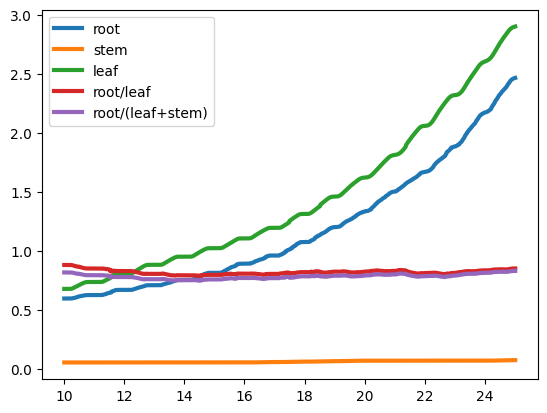

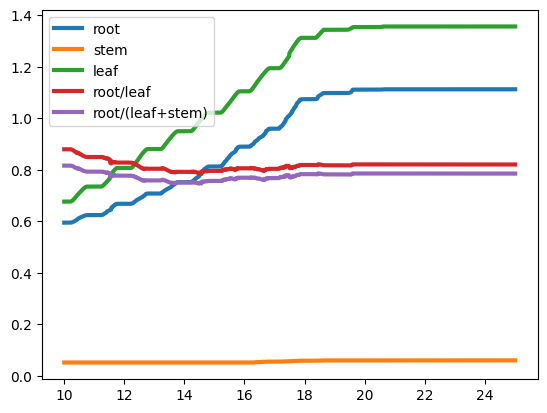

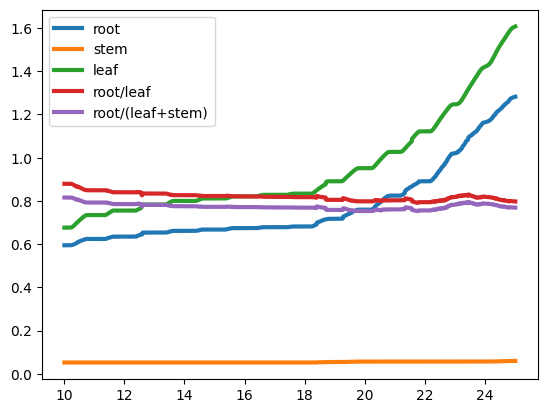

In [126]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    st_orgs = getVal(dataInput[i],'st_orgs.txt')
    rootVol = volOrg[(ot_orgs == 2)].sum(axis=1)
    stemVol = volOrg[(ot_orgs == 3)].sum(axis=1)*0.1
    leafVol = volOrg[(ot_orgs == 4)].sum(axis=1)
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,rootVol,linewidth=3, label='root',
                        )
    plt.plot(time ,stemVol,linewidth=3, label='stem',
                        )
    plt.plot(time ,leafVol,linewidth=3, label='leaf',
                        )
    plt.plot(time ,rootVol/(leafVol),linewidth=3, label='root/leaf',
                        )
    plt.plot(time ,rootVol/(stemVol+leafVol),linewidth=3, label='root/(leaf+stem)',
                        )
    plt.legend()
    plt.show()
    plt.close()

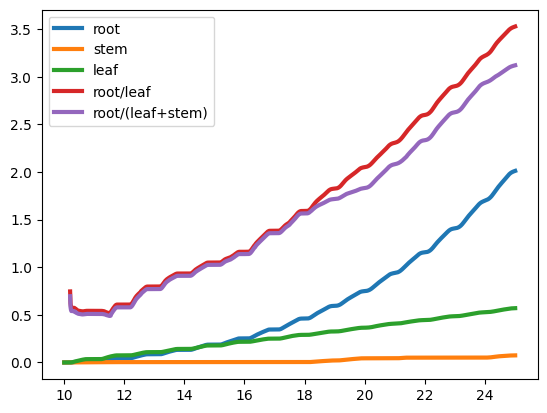

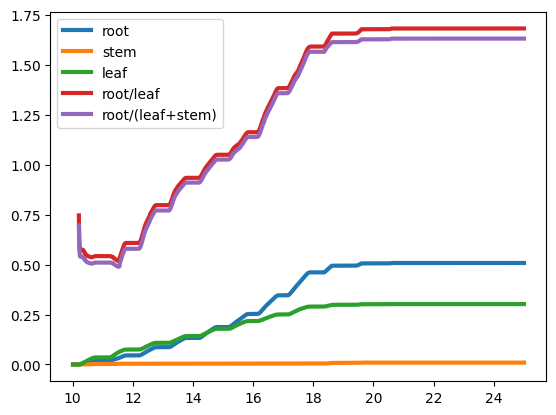

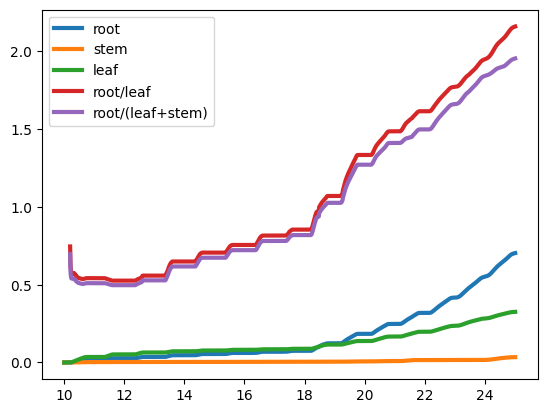

In [133]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
mmolSuc_to_molC = 1/1e3*12
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')*mmolSuc_to_molC*0
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')*0.8 #+getVal(dataInput[i],'Q_S_ST.txt'
    #       )+ getVal(dataInput[i],'Q_S_meso.txt') 
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    ots = getVal(dataInput[i],'organTypes.txt')
    ots.insert(0, "seed", 0)
    rootVol = volOrg[(ot_orgs == 2)].sum(axis=1)[0]+Q_Gr[(ots == 2)].sum(axis=1)
    stemVol = volOrg[(ot_orgs == 3)].sum(axis=1)[0]+Q_Gr[(ots == 3)].sum(axis=1)
    leafVol = volOrg[(ot_orgs == 4)].sum(axis=1)[0]+Q_Gr[(ots == 4)].sum(axis=1)
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,rootVol*100,linewidth=3, label='root',
                        )
    plt.plot(time ,stemVol*100,linewidth=3, label='stem',
                        )
    plt.plot(time ,leafVol*100,linewidth=3, label='leaf',
                        )
    plt.plot(time ,rootVol/(leafVol),linewidth=3, label='root/leaf',
                        )
    plt.plot(time ,rootVol/(stemVol+leafVol),linewidth=3, label='root/(leaf+stem)',
                        )
    plt.legend()
    plt.show()
    plt.close()

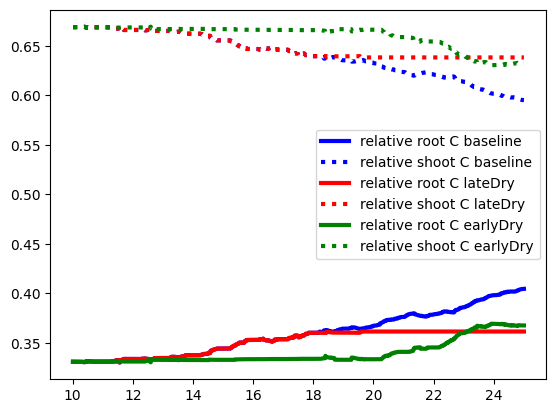

In [7]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
cc = ['b','r','g']
ll = ['-',':']
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    st_orgs = getVal(dataInput[i],'st_orgs.txt')
    rootVol = volOrg[(ot_orgs == 2)].sum(axis=1)
    stemVol = volOrg[(ot_orgs == 3)].sum(axis=1)
    leafVol = volOrg[(ot_orgs == 4)&(st_orgs==1)].sum(axis=1)
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,(rootVol)/(stemVol+leafVol+rootVol),
             linewidth=3, label='relative root C '+scenarios[i],color=cc[i],linestyle = ll[0]
                        )
    plt.plot(time ,(stemVol+leafVol)/(rootVol+stemVol+leafVol),
             linewidth=3, label='relative shoot C '+scenarios[i],color=cc[i],linestyle= ll[1]
                        )
plt.legend()
plt.show()
plt.close()

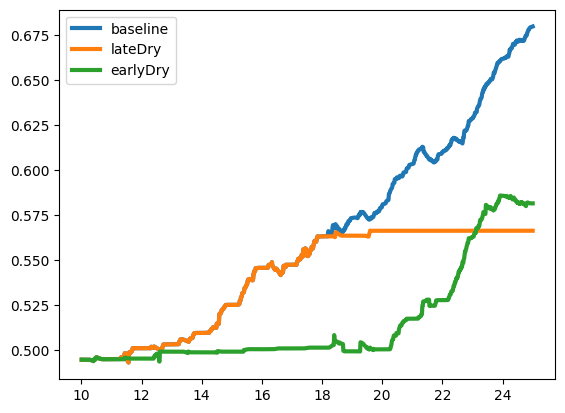

(1080, 238) (1080, 238)


In [117]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    rootVol = volOrg[(ot_orgs == 2)].sum(axis=1)
    stemVol = volOrg[(ot_orgs == 3)].sum(axis=1)
    leafVol = volOrg[(ot_orgs == 4)].sum(axis=1)
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,(rootVol)/(stemVol+leafVol),linewidth=3, label=scenarios[i],
                        )
plt.legend()
plt.show()
plt.close()
print(volOrg.shape,ot_orgs.shape)

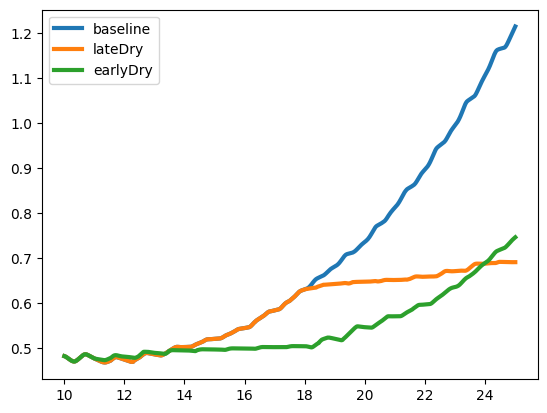

In [129]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
mmolSuc_to_molC = 1/1e3*12
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')*mmolSuc_to_molC
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')*0.8 +getVal(dataInput[i],'Q_S_ST.txt'
           )+ getVal(dataInput[i],'Q_S_meso.txt') 
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    ots = getVal(dataInput[i],'organTypes.txt')
    ots.insert(0, "seed", 0)
    rootVol = volOrg[(ot_orgs == 2)].sum(axis=1)[0]+Q_Gr[(ots == 2)].sum(axis=1)
    stemVol = volOrg[(ot_orgs == 3)].sum(axis=1)[0]+Q_Gr[(ots == 3)].sum(axis=1)
    leafVol = volOrg[(ot_orgs == 4)].sum(axis=1)[0]+Q_Gr[(ots == 4)].sum(axis=1)
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,(rootVol)/(stemVol+leafVol),linewidth=3, label=scenarios[i],
                        )
plt.legend()
plt.show()
plt.close()

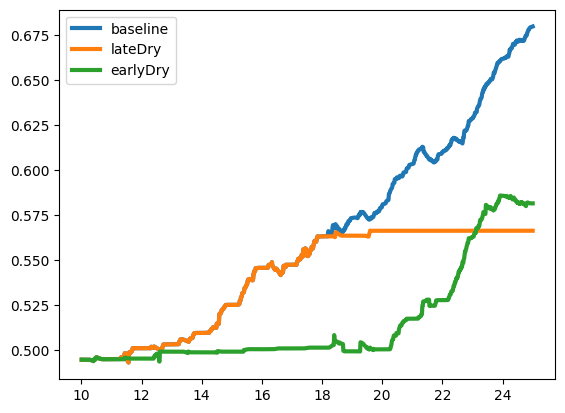

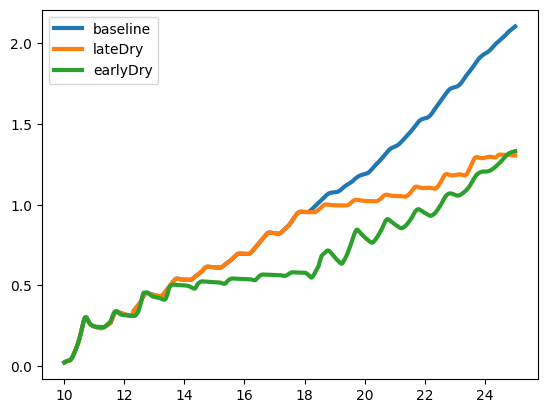

In [86]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
mmolSuc_to_molC = 1/1e3*12
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')*mmolSuc_to_molC
    Q_Gr = + getVal(dataInput[i],'Q_S_ST.txt'
           )+ getVal(dataInput[i],'Q_S_meso.txt') 
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    st_orgs = getVal(dataInput[i],'st_orgs.txt')
    rootVol = volOrg[(ot_orgs == 2)].sum(axis=1)#+Q_Gr[(ot_orgs == 2)].sum(axis=1)
    stemVol = volOrg[(ot_orgs == 3)].sum(axis=1)#+Q_Gr[(ot_orgs == 3)].sum(axis=1)
    leafVol = volOrg[(ot_orgs == 4)].sum(axis=1)#+Q_Gr[(ot_orgs == 4)].sum(axis=1)
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,(rootVol)/(stemVol+leafVol),linewidth=3, label=scenarios[i],
                        )
plt.legend()
plt.show()
plt.close()
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')*mmolSuc_to_molC
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')*0.8 + getVal(dataInput[i],'Q_S_ST.txt'
           )+ getVal(dataInput[i],'Q_S_meso.txt') 
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    st_orgs = getVal(dataInput[i],'st_orgs.txt')
    ots = getVal(dataInput[i],'organTypes.txt')
    ots.insert(0, "seed", 0)
    sts = getVal(dataInput[i],'subTypes.txt')
    sts.insert(0, "seed", 0)
    rootVol = Q_Gr[(ots == 2)].sum(axis=1)
    stemVol = Q_Gr[(ots == 3)].sum(axis=1)
    leafVol = Q_Gr[(ots == 4)].sum(axis=1)
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,(rootVol)/(stemVol+leafVol),linewidth=3, label=scenarios[i],
                        )
plt.legend()
plt.show()
plt.close()

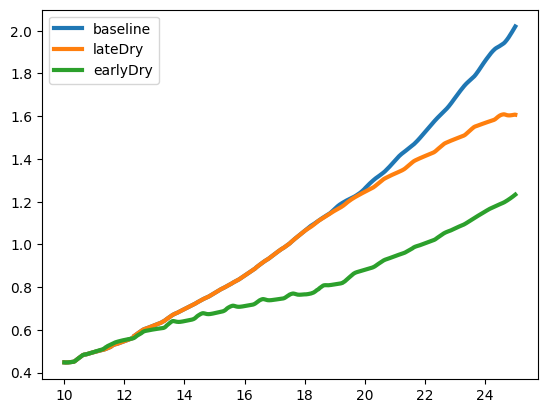

In [103]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
mmolSuc_to_molC = 1/1e3*12
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')+getVal(
        dataInput[i],'Q_Rm.txt')+getVal(dataInput[i],'Q_Exud.txt'
         )+ getVal(dataInput[i],'Q_S_ST.txt'
           )+getVal( dataInput[i],'Q_Mucil.txt')+getVal(dataInput[i],'Q_S_meso.txt') + getVal(dataInput[i],'Q_meso.txt')+ getVal(
        dataInput[i],'Q_ST.txt')
    ots = getVal(dataInput[i],'organTypes.txt')
    ots.insert(0, "seed", 2)
    rootinit = volOrg[(ot_orgs == 2)].sum(axis=1)[0]*0.5 * mmolSuc_to_molC
    steminit = volOrg[(ot_orgs == 3)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    leafinit = volOrg[(ot_orgs == 4)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    rootVol = Q_Gr[(ots == 2)].sum(axis=1)+rootinit#*0
    #rootVol2 = Q_Gr[(ot_orgs == 2)].sum(axis=1)+rootinit*0
    stemVol = Q_Gr[(ots == 3)].sum(axis=1)+steminit
    leafVol = Q_Gr[(ots == 4)].sum(axis=1)+leafinit
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,(rootVol).div(stemVol+leafVol),linewidth=3, label=scenarios[i],
                        )
    #plt.plot(time[100:] ,(rootVol2)[100:]/(stemVol+leafVol)[100:],linewidth=3, label=scenarios[i]+'bis',
    #    )
plt.legend()
plt.show()
plt.close()

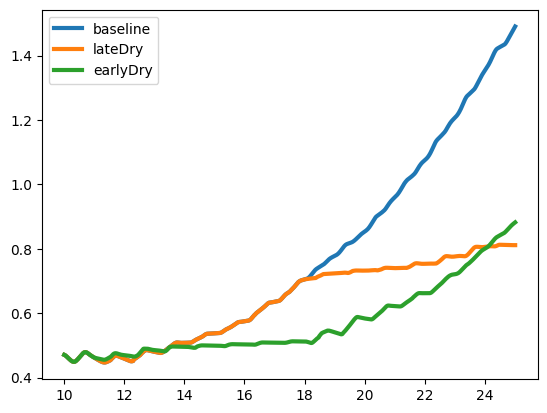

(1080, 238) (1080, 238)
(1080, 567) (1080, 567)


In [110]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
mmolSuc_to_molC = 1/1e3*12
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')*0.8+ getVal(dataInput[i],'Q_S_meso.txt')+ getVal(
        dataInput[i],'Q_S_ST.txt')
    ots = getVal(dataInput[i],'organTypes.txt')
    ots.insert(0, "seed", 2)
    rootinit = volOrg[(ot_orgs == 2)].sum(axis=1)[0]*0.5 * mmolSuc_to_molC
    steminit = volOrg[(ot_orgs == 3)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    leafinit = volOrg[(ot_orgs == 4)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    rootVol = Q_Gr[(ots == 2)].sum(axis=1)+rootinit#*0
    #rootVol2 = Q_Gr[(ot_orgs == 2)].sum(axis=1)+rootinit*0
    stemVol = Q_Gr[(ots == 3)].sum(axis=1)+steminit
    leafVol = Q_Gr[(ots == 4)].sum(axis=1)+leafinit
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,(rootVol).div(stemVol+leafVol),linewidth=3, label=scenarios[i],
                        )
    #plt.plot(time[100:] ,(rootVol2)[100:]/(stemVol+leafVol)[100:],linewidth=3, label=scenarios[i]+'bis',
    #    )
plt.legend()
plt.show()
plt.close()
print(volOrg.shape,ot_orgs.shape)
print(Q_Gr.shape,ots.shape)

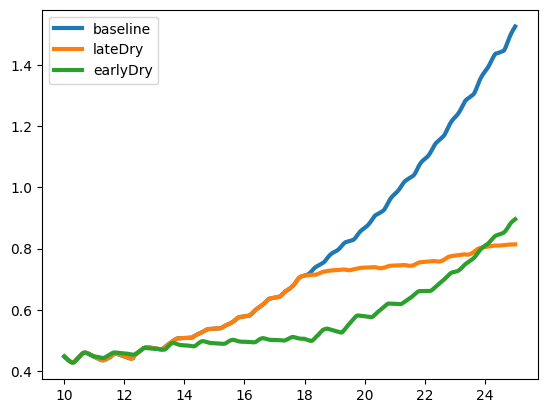

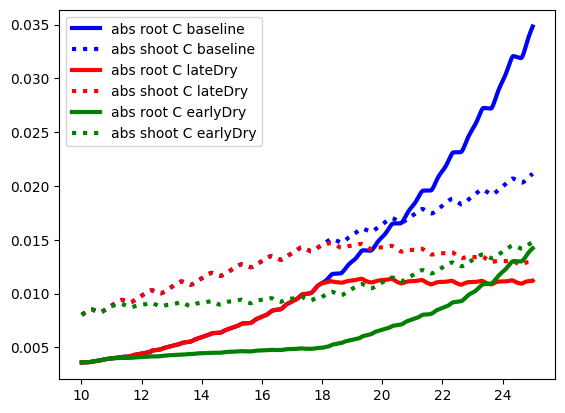

In [97]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
cc = ['b','r','g']
ll = ['-',':']
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')+ getVal(dataInput[i],'Q_S_ST.txt'
           )+ getVal(dataInput[i],'Q_S_meso.txt') + getVal(dataInput[i],'Q_meso.txt')+ getVal(
        dataInput[i],'Q_ST.txt')
    ots = getVal(dataInput[i],'organTypes.txt')
    ots.insert(0, "seed", 0)
    rootinit = volOrg[(ot_orgs == 2)].sum(axis=1)[0]*0.5 * mmolSuc_to_molC
    steminit = volOrg[(ot_orgs == 3)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    leafinit = volOrg[(ot_orgs == 4)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    rootVol = Q_Gr[(ots == 2)].sum(axis=1)+rootinit#*0
    #rootVol2 = Q_Gr[(ot_orgs == 2)].sum(axis=1)+rootinit*0
    stemVol = Q_Gr[(ots == 3)].sum(axis=1)+steminit
    leafVol = Q_Gr[(ots == 4)].sum(axis=1)+leafinit
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,rootVol,
             linewidth=3, label='abs root C '+scenarios[i],color=cc[i],linestyle = ll[0]
                        )
    plt.plot(time ,stemVol+leafVol,
             linewidth=3, label='abs shoot C '+scenarios[i],color=cc[i],linestyle= ll[1]
                        )
plt.legend()
plt.show()
plt.close()

In [96]:
volOrg.sum(axis=1)

0       1.797270
1       1.797270
2       1.797270
3       1.797270
4       1.797270
          ...   
1075    3.481385
1076    3.482963
1077    3.484370
1078    3.485660
1079    3.486891
Length: 1080, dtype: float64

In [93]:
rootVol.div

0       0.003590
1       0.003591
2       0.003592
3       0.003594
4       0.003595
          ...   
1075    0.014060
1076    0.014097
1077    0.014134
1078    0.014171
1079    0.014206
Length: 1080, dtype: float64

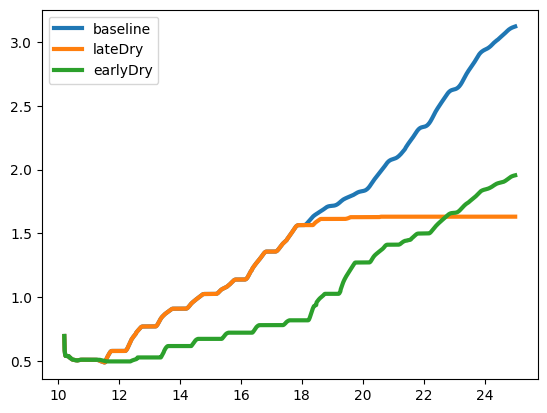

In [134]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
mmolSuc_to_molC = 1/1e3*12
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')#+ getVal(dataInput[i],'Q_S_ST.txt'
           #)+ getVal(dataInput[i],'Q_S_meso.txt')  #+ getVal(dataInput[i],'Q_meso.txt')+ getVal(
    #    dataInput[i],'Q_ST.txt')
    ots = getVal(dataInput[i],'organTypes.txt')
    ots.insert(0, "seed", 0)
    rootinit = volOrg[(ot_orgs == 2)].sum(axis=1)[0]*0.5 * mmolSuc_to_molC
    steminit = volOrg[(ot_orgs == 3)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    leafinit = volOrg[(ot_orgs == 4)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    rootVol = Q_Gr[(ots == 2)].sum(axis=1)#+rootinit#*0
    #rootVol2 = Q_Gr[(ot_orgs == 2)].sum(axis=1)+rootinit*0
    stemVol = Q_Gr[(ots == 3)].sum(axis=1)#+steminit
    leafVol = Q_Gr[(ots == 4)].sum(axis=1)#+leafinit
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,(rootVol)/(stemVol+leafVol),linewidth=3, label=scenarios[i],
                        )
    #plt.plot(time[100:] ,(rootVol2)[100:]/(stemVol+leafVol)[100:],linewidth=3, label=scenarios[i]+'bis',
    #    )
plt.legend()
plt.show()
plt.close()

In [ ]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
mmolSuc_to_molC = 1/1e3*12
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')*0.8+ getVal(dataInput[i],'Q_S_ST.txt'
           )+ getVal(dataInput[i],'Q_S_meso.txt')  #+ getVal(dataInput[i],'Q_meso.txt')+ getVal(
    #    dataInput[i],'Q_ST.txt')
    ots = getVal(dataInput[i],'organTypes.txt')
    ots.insert(0, "seed", 0)
    rootinit = volOrg[(ot_orgs == 2)].sum(axis=1)[0]*0.5 * mmolSuc_to_molC
    steminit = volOrg[(ot_orgs == 3)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    leafinit = volOrg[(ot_orgs == 4)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    rootVol = Q_Gr[(ots == 2)].sum(axis=1)+rootinit#*0
    #rootVol2 = Q_Gr[(ot_orgs == 2)].sum(axis=1)+rootinit*0
    stemVol = Q_Gr[(ots == 3)].sum(axis=1)+steminit
    leafVol = Q_Gr[(ots == 4)].sum(axis=1)+leafinit
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,(rootVol)/(stemVol+leafVol),linewidth=3, label=scenarios[i],
                        )
    #plt.plot(time[100:] ,(rootVol2)[100:]/(stemVol+leafVol)[100:],linewidth=3, label=scenarios[i]+'bis',
    #    )
plt.legend()
plt.show()
plt.close()

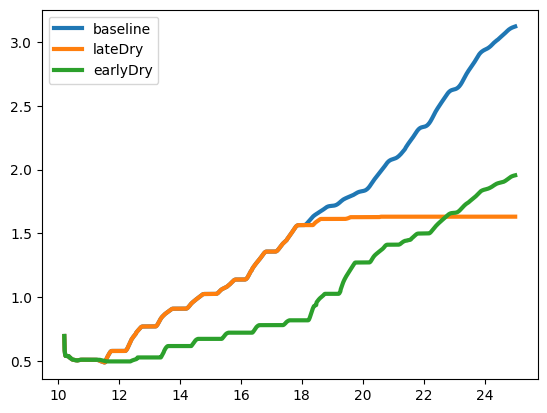

In [79]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
mmolSuc_to_molC = 1/1e3*12
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')
    ot_orgs = getVal(dataInput[i],'ot_orgs.txt')
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')*0.8#+ getVal(dataInput[i],'Q_S_ST.txt'
           #)+ getVal(dataInput[i],'Q_S_meso.txt')  #+ getVal(dataInput[i],'Q_meso.txt')#+ getVal(
    #    dataInput[i],'Q_ST.txt')#+ getVal(dataInput[i],'Q_ST.txt')
    ots = getVal(dataInput[i],'organTypes.txt')
    ots.insert(0, "seed", 0)
    rootinit = volOrg[(ot_orgs == 2)].sum(axis=1)[0]*0.5 * mmolSuc_to_molC
    steminit = volOrg[(ot_orgs == 3)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    leafinit = volOrg[(ot_orgs == 4)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    rootVol = Q_Gr[(ots == 2)].sum(axis=1)#+rootinit#*0
    #rootVol2 = Q_Gr[(ot_orgs == 2)].sum(axis=1)+rootinit*0
    stemVol = Q_Gr[(ots == 3)].sum(axis=1)#+steminit
    leafVol = Q_Gr[(ots == 4)].sum(axis=1)#+leafinit
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time ,(rootVol)/(stemVol+leafVol),linewidth=3, label=scenarios[i],
                        )
    #plt.plot(time[100:] ,(rootVol2)[100:]/(stemVol+leafVol)[100:],linewidth=3, label=scenarios[i]+'bis',
    #                    )
plt.legend()
plt.show()
plt.close()

In [50]:
print((rootVol)[100:105]/(stemVol+leafVol)[100:105],(rootVol2)[100:105]/(stemVol+leafVol)[100:105])

100    20.984993
101    20.438218
102    19.927494
103    19.447691
104    18.995905
dtype: float64 100    0.498801
101    0.497663
102    0.496222
103    0.494823
104    0.493584
dtype: float64


In [52]:
rootVol[100:105]

100    0.011046
101    0.011053
102    0.011059
103    0.011065
104    0.011071
dtype: float64

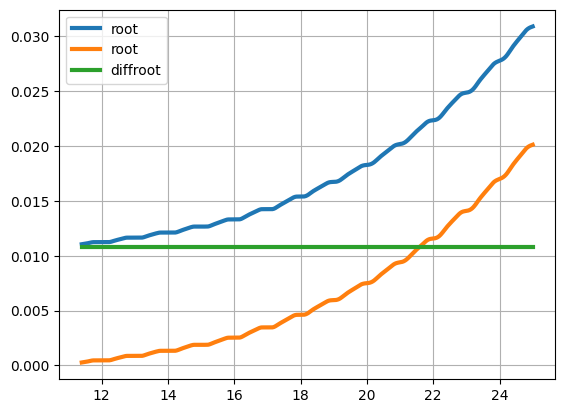

In [45]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
mmolSuc_to_molC = 1/1e3*12
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
for i in range(1):
    volOrg = getVal(dataInput[i],'volOrg.txt')
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')*0.8#+ getVal(dataInput[i],'Q_S_ST.txt'
           #)+ getVal(dataInput[i],'Q_S_meso.txt')  #+ getVal(dataInput[i],'Q_meso.txt')#+ getVal(
    #    dataInput[i],'Q_ST.txt')#+ getVal(dataInput[i],'Q_ST.txt')
    ot_orgs = getVal(dataInput[i],'organTypes.txt')
    ot_orgs.insert(0, "seed", 0)
    st_orgs = getVal(dataInput[i],'subTypes.txt')
    st_orgs.insert(0, "seed", 0)
    rootinit = volOrg[(ot_orgs == 2)].sum(axis=1)[0]*0.5 * mmolSuc_to_molC
    steminit = volOrg[(ot_orgs == 3)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    leafinit = volOrg[(ot_orgs == 4)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    rootVol = Q_Gr[(ot_orgs == 2)].sum(axis=1)+rootinit#*0
    rootVol2 = Q_Gr[(ot_orgs == 2)].sum(axis=1)+rootinit*0
    stemVol = Q_Gr[(ot_orgs == 3)].sum(axis=1)+steminit
    leafVol = Q_Gr[(ot_orgs == 4)].sum(axis=1)+leafinit
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time[100:] ,(rootVol)[100:],linewidth=3, label='root',
                        )
    plt.plot(time[100:] ,(rootVol2)[100:],linewidth=3, label='root',
                        )
    #plt.plot(time[100:] ,stemVol[100:],linewidth=3, label='stem')
    #plt.plot(time[100:] ,leafVol[100:],linewidth=3, label='leaf')
    plt.plot(time[100:] ,(-rootVol2+rootVol)[100:],linewidth=3, label='diffroot',
                        )
plt.grid(True)
plt.legend()
plt.show()
plt.close()

In [44]:
print(leafinit,steminit)

0.0 0.0


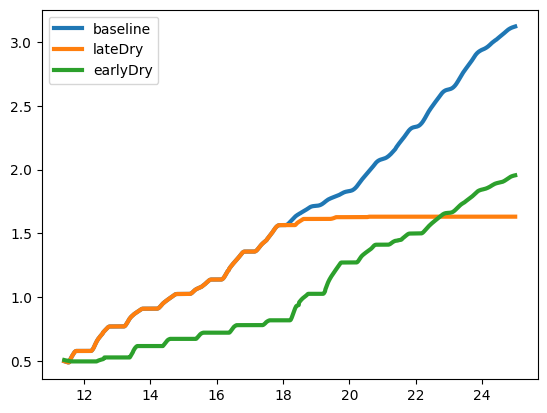

In [39]:
path2file = r'TraiRhizo/paperSc/NewSetup/{}_1440_{}_10to25_20mn_0s_32/'
pathresults = "../../scripts/results/"
scenarios = [ "baseline", "lateDry","earlyDry"]
setIds =[61]# ,44,49 [7,21, 47, 85]
mmolSuc_to_molC = 1/1e3*12
# result_list_compExcept = [path2file.format(scenario, str(setId)) for scenario, setId in exceptPsets]
dataInput =  [path2file.format(scenario, str(setId)) for scenario in scenarios 
              for setId in setIds if (scenario, str(setId)) 
              not in exceptPset ]
for i in range(3):
    volOrg = getVal(dataInput[i],'volOrg.txt')
    Q_Gr = getVal(dataInput[i],'Q_Gr.txt')*0.8#+ getVal(dataInput[i],'Q_S_ST.txt'
           #)+ getVal(dataInput[i],'Q_S_meso.txt')  #+ getVal(dataInput[i],'Q_meso.txt')#+ getVal(
    #    dataInput[i],'Q_ST.txt')#+ getVal(dataInput[i],'Q_ST.txt')
    ot_orgs = getVal(dataInput[i],'organTypes.txt')
    ot_orgs.insert(0, "seed", 0)
    st_orgs = getVal(dataInput[i],'subTypes.txt')
    st_orgs.insert(0, "seed", 0)
    rootinit = volOrg[(ot_orgs == 2)].sum(axis=1)[0]*0.5 * mmolSuc_to_molC
    steminit = volOrg[(ot_orgs == 3)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    leafinit = volOrg[(ot_orgs == 4)].sum(axis=1)[0]*0.5*mmolSuc_to_molC
    rootVol = Q_Gr[(ot_orgs == 2)].sum(axis=1)#+rootinit#*0
    stemVol = Q_Gr[(ot_orgs == 3)].sum(axis=1)#+steminit
    leafVol = Q_Gr[(ot_orgs == 4)].sum(axis=1)#+leafinit
    time = np.array(list(
                pd.read_csv(pathresults + dataInput[0] + "time.txt", 
                               names = ["time","Qlight"])["time"][1:])) 
    plt.plot(time[100:] ,(rootVol)[100:]/(stemVol+leafVol)[100:],linewidth=3, label=scenarios[i],
                        )
plt.legend()
plt.show()
plt.close()

In [37]:
Q_Gr[(ot_orgs == 2)].sum(axis=1)+rootinit

0       0.010784
1       0.010784
2       0.010784
3       0.010784
4       0.010784
          ...   
1075    0.017790
1076    0.017798
1077    0.017805
1078    0.017812
1079    0.017817
Length: 1080, dtype: float64

In [38]:
Q_Gr[(ot_orgs == 2)].sum(axis=1)#+rootinit

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1075    0.007006
1076    0.007014
1077    0.007021
1078    0.007028
1079    0.007033
Length: 1080, dtype: float64

In [24]:
Q_Gr[(ot_orgs == 2)].sum(axis=1)

0       0.000009
1       0.000010
2       0.000011
3       0.000012
4       0.000013
          ...   
1075    0.008142
1076    0.008176
1077    0.008210
1078    0.008244
1079    0.008276
Length: 1080, dtype: float64

In [23]:
print(rootinit ,steminit,leafinit )

0.8986350627896563 0.0 0.0


In [ ]:
set(st_orgs[ot_orgs ==3].to_numpy().flatten())

In [45]:
Q_Gr = getVal(dataInput[i],'Q_Gr.txt')
ot_orgs = getVal(dataInput[i],'organTypes.txt')
ot_orgs.insert(0, "seed", 0)
st_orgs = getVal(dataInput[i],'subTypes.txt')
st_orgs.insert(0, "seed", 0)

In [46]:
Q_Gr.shape

(1080, 1212)

In [51]:
time.min()

10.01388888888889

In [53]:
root1Vol.shape

(1080,)

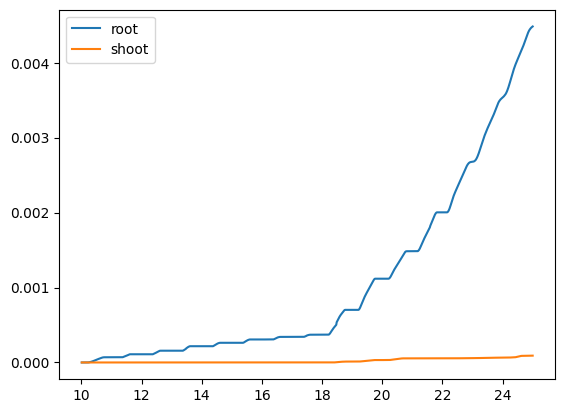

In [61]:
plt.plot(time, (root1Vol+root2Vol+root3Vol), label='root')
plt.plot(time, (stem1Vol+stem4Vol+leafVol), label='shoot')
plt.legend()

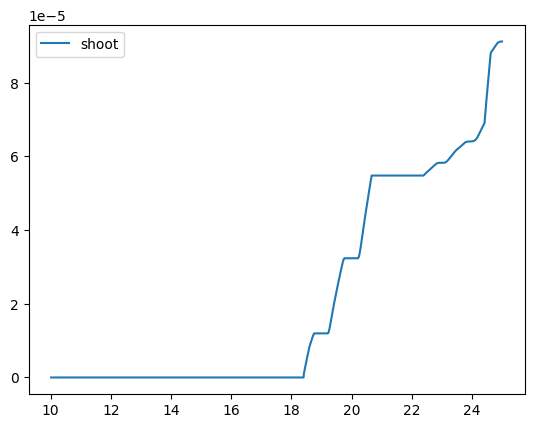

In [62]:

plt.plot(time, (stem1Vol+stem4Vol+leafVol), label='shoot')
plt.legend()